# Machine Learning Homework 2023

- Valentina Margiotta 
- Sara Resta

In [1]:
# Generic libraries
import seaborn as sns
import pandas as pd
import numpy as np

# To visualize the data
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Regression and classification models
import sklearn
import scipy
from scipy.stats import t
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, normalize
from sklearn.metrics import r2_score, mean_squared_error, make_scorer, classification_report, roc_auc_score, confusion_matrix, pairwise_distances, roc_curve, auc
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier, NearestNeighbors
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

# Cross validation
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.pipeline import Pipeline

# Correlation test
from scipy.stats import chi2_contingency, f_oneway, spearmanr

# Clustering
import matplotlib.colors as mcolors
import random
from sklearn import cluster, datasets
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from mpl_toolkits.mplot3d import Axes3D

from sklearn.feature_selection import VarianceThreshold, RFECV
from sklearn.dummy import DummyRegressor
from sklearn.calibration import CalibratedClassifierCV

import warnings
warnings.filterwarnings("ignore")

Importing the datasets. We have three datasets:
- online_shoppers: the complete dataset
- training_set: subset of online_shoppers used for training
- test_set: subset of online_shoppers used for test

In [2]:
training_set_complete = pd.read_csv("data/training_set_online_shoppers_intention.csv")
test_set = pd.read_csv("data/test_set_online_shoppers_intention.csv")

## INDEX

1. [PRELIMINARY ANALYSIS AND REGRESSION ALGORITHMS](#1.-PRELIMINARY-ANALYSIS-AND-REGRESSION-ALGORITHMS)

 1.1 [Dataset inspection](#1.1-Dataset-inspection)
 - Correlation
 - Focus on the target variable: Revenue
 - Focus on the target variable: ExitRates

 1.2 [Variance selection](#1.2-Variance-selection)

 1.3 [Regression](#1.3-Regression)

 1.4 [Linear and polynomial regression](#1.4-Linear-and-polynomial-regression)

 1.5 [Improvements of linear regression](#1.5-Improvements-of-linear-regression)
 - Ridge regression
 - Lasso
 - Linear regression vs linear regression with Ridge and Lasso
 - Forward stepwise selection

 1.6 [KNN algorithm](#1.6-KNN-algorithm)
 
 1.7 [Models comparison](#1.7-Models-comparison)
 
 1.8 [Filling missing values](#1.8-Filling-missing-values)

---
2. [CLASSIFICATION](#2.-CLASSIFICATION)

 2.1 [Variance selection](#2.1-Variance-selection)
 
 2.2 [Functions and algorithms](#2.2-Functions-and-algorithms)
  - Feature selection: Forward stepwise selection
  - Accuracy, sensitivity, specificity
  - Evaluation metrics
  
 2.3 [Logistic regression](#2.3-Logistic-regression)
 
 2.4 [LDA](#2.4-LDA)
 
 2.5 [QDA](#2.5-QDA)
 
 2.6 [KNN](#2.6-KNN)
  
 2.7 [SVM](#2.7-SVM)
 
 2.8 [ExitRates importance](#2.8-ExitRates-importance)
 
 2.9 [Algorithms comparison](#2.9-Algorithms-comparison)
 
---

3. [CLUSTERING](#3.-CLUSTERING)

 3.1 [Variance selection](#3.1-Variance-selection)
 
 3.2 [Functions to evaluate clustering performances](#3.2-Functions-to-evaluate-clustering-performances)
 
 3.3 [PCA](#3.3-PCA)
 
 3.4 [Clustering](#3.4-Clustering)
 
 3.5 [Hierarchical clustering](#3.5-Hierarchical-clustering)
  - Bottom-up
  
 3.6 [Partitioning clustering](#3.6-Partitioning-clustering)
  - K-means
  - DBSCAN
 
 3.7 [Comparison between the algorithms](#3.7-Comparison-between-the-algorithms)

---
4. [CONCLUSION](#4.-Conclusion)

## 1. PRELIMINARY ANALYSIS AND REGRESSION ALGORITHMS

For this first exercise we use the training set, which is composed of 9248 rows and 19 columns. Columns are dataset attributes and include both categorical and numerical variables.
* 9 numerical variables + "ExitRates"
* 7 categorical variables + "Revenue"
* 1 useless variable, "Unnamed: 0"

In [3]:
training_set_complete = training_set_complete.drop(columns=['Unnamed: 0'])
print(training_set_complete.shape)
training_set_complete.head()

(9248, 18)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.0,5,19.000000,0.000000,0.080000,0.000000,0.6,May,2,2,1,3,Returning_Visitor,False,False
1,5,158.700000,0,0.0,51,1364.266667,0.007692,0.011987,0.000000,0.0,Nov,3,2,3,2,Returning_Visitor,True,False
2,7,87.916667,1,0.0,46,1621.025379,0.004082,0.020544,6.023523,0.0,Dec,1,1,3,2,Returning_Visitor,False,False
3,1,4.000000,0,0.0,37,1296.942857,0.013889,NaN,0.000000,0.8,May,2,2,4,2,Returning_Visitor,False,False
4,2,132.400000,0,0.0,11,296.300000,0.000000,NaN,0.000000,0.0,Sep,2,4,3,2,New_Visitor,False,False


Assign "categorical" type to categorical variables.

In [4]:
training_set_complete['Month']=training_set_complete['Month'].astype('category')
training_set_complete['OperatingSystems']=training_set_complete['OperatingSystems'].astype('category')
training_set_complete['Browser']=training_set_complete['Browser'].astype('category')
training_set_complete['Region']=training_set_complete['Region'].astype('category')
training_set_complete['TrafficType']=training_set_complete['TrafficType'].astype('category')
training_set_complete['VisitorType']=training_set_complete['VisitorType'].astype('category')
training_set_complete['Weekend']=training_set_complete['Weekend'].astype('category')
training_set_complete['Revenue']=training_set_complete['Revenue'].astype('category')

In [5]:
training_set = training_set_complete.copy()

We noticed that variables "Browser" and "TrafficType" are rispectively numbered from 1 to 13 and from 1 to 20, but some of these categories are empty (without data). We decided to set empty columns to represent these categories in order to eventually receive non-zero values present in the test dataset.

Then, we do one-hot encoding to obtain dummy variables, so that categorical variables can be correctly treated in the regression setting.

In [6]:
all_categories_browser = list(range(1,14))
all_categories_traffic_type = list(range(1,21))
training_set_complete['Browser'] = training_set_complete['Browser'].cat.set_categories(all_categories_browser)
training_set_complete['TrafficType'] = training_set_complete['TrafficType'].cat.set_categories(all_categories_traffic_type)

training_set_complete = pd.get_dummies(training_set_complete, columns=['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType','Weekend'], drop_first=False)
missing_values = training_set_complete.copy()
missing_values = missing_values[missing_values['ExitRates'].isna()]

training_set_reg = training_set_complete.copy()
training_set_reg = training_set_reg[training_set_reg['ExitRates'].isna()==False]

From now on, we will work on training_set to do some inspections of the data.

Assign a chronological order to "Month" variable.

In [7]:
month_order = ['Feb', 'Mar', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_order = pd.Categorical(training_set['Month'], categories=month_order, ordered=True)
training_set['Month'] = month_order.sort_values()

In [8]:
# Numeric variables
numeric_features_Exit = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
numeric_features_noExit = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'PageValues', 'SpecialDay']

# Categorical variables once obtained dummy variables
categorical_features = ['Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'OperatingSystems_1', 'OperatingSystems_2', 'OperatingSystems_3',
       'OperatingSystems_4', 'OperatingSystems_5', 'OperatingSystems_6',
       'OperatingSystems_7', 'OperatingSystems_8', 'Browser_1', 'Browser_2',
       'Browser_3', 'Browser_4', 'Browser_5', 'Browser_6', 'Browser_7',
       'Browser_8', 'Browser_9', 'Browser_10', 'Browser_11', 'Browser_12',
       'Browser_13', 'Region_1', 'Region_2', 'Region_3', 'Region_4',
       'Region_5', 'Region_6', 'Region_7', 'Region_8', 'Region_9',
       'TrafficType_1', 'TrafficType_2', 'TrafficType_3', 'TrafficType_4',
       'TrafficType_5', 'TrafficType_6', 'TrafficType_7', 'TrafficType_8',
       'TrafficType_9', 'TrafficType_10', 'TrafficType_11', 'TrafficType_12',
       'TrafficType_13', 'TrafficType_14', 'TrafficType_15', 'TrafficType_16',
       'TrafficType_17', 'TrafficType_18', 'TrafficType_19', 'TrafficType_20',
       'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor', 'Weekend_False', 'Weekend_True']

## 1.1 Dataset inspection

We check if there's any NA value and we see that there are some NA values for the "ExitRates" variable.

In [9]:
# Check for NA values
np.sum(training_set.isna())

Administrative                0
Administrative_Duration       0
Informational                 0
Informational_Duration        0
ProductRelated                0
ProductRelated_Duration       0
BounceRates                   0
ExitRates                  2782
PageValues                    0
SpecialDay                    0
Month                         0
OperatingSystems              0
Browser                       0
Region                        0
TrafficType                   0
VisitorType                   0
Weekend                       0
Revenue                       0
dtype: int64

We drop rows with NA in the "ExitRates" column.

In [10]:
training_set = training_set[training_set['ExitRates'].isna()==False]
print(training_set.shape) # 9248 - 2782 = 6466
np.sum(training_set.isna())

(6466, 18)


Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

Creation of two dataframes, one containing all the categorical variables and one containing the numerical ones.

In [11]:
df_cat = pd.DataFrame({'Month':training_set['Month'],
                       'OperatingSystems':training_set['OperatingSystems'],
                       'Browser':training_set['Browser'],
                       'Region':training_set['Region'],
                       'TrafficType':training_set['TrafficType'],
                       'VisitorType':training_set['VisitorType'],
                       'Weekend':training_set['Weekend'],
                       'Revenue':training_set['Revenue']})
df_num = pd.DataFrame({'Administrative':training_set['Administrative'],
                   'Administrative_Duration':training_set['Administrative_Duration'],
                   'Informational':training_set['Informational'],
                   'Informational_Duration':training_set['Informational_Duration'],
                   'ProductRelated':training_set['ProductRelated'], 
                   'ProductRelated_Duration':training_set['ProductRelated_Duration'],
                   'BounceRates':training_set['BounceRates'], 
                   'ExitRates':training_set['ExitRates'],
                   'PageValues':training_set['PageValues'], 
                   'SpecialDay':training_set['SpecialDay']})

Dataset summary for categorical and numerical variables.

In [12]:
df_cat.describe()

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,6466,6466,6466,6466,6466,6466,6466,6466
unique,10,8,12,9,20,3,2,2
top,May,2,2,1,2,Returning_Visitor,False,False
freq,1748,3481,4179,2493,2086,5520,5003,5457


In [13]:
df_num.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,6466.000000,6466.000000,6466.000000,6466.000000,6466.000000,6466.000000,6466.000000,6466.000000,6466.000000,6466.000000
mean,2.286576,78.764519,0.500309,34.265697,31.608877,1184.319193,0.021911,0.042791,5.866036,0.061274
std,3.285393,168.883876,1.243980,134.169156,43.760806,1769.932298,0.047998,0.048164,18.574180,0.198339
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,183.412500,0.000000,0.014286,0.000000,0.000000
50%,1.000000,7.000000,0.000000,0.000000,18.000000,594.358333,0.003125,0.025000,0.000000,0.000000
75%,4.000000,89.995000,0.000000,0.000000,37.000000,1470.523958,0.016667,0.050000,0.000000,0.000000
max,27.000000,2720.500000,12.000000,2195.300000,584.000000,24844.156200,0.200000,0.200000,361.763742,1.000000


We do some visual inspection on categorical variables. We notice that binary variables are not balanced.

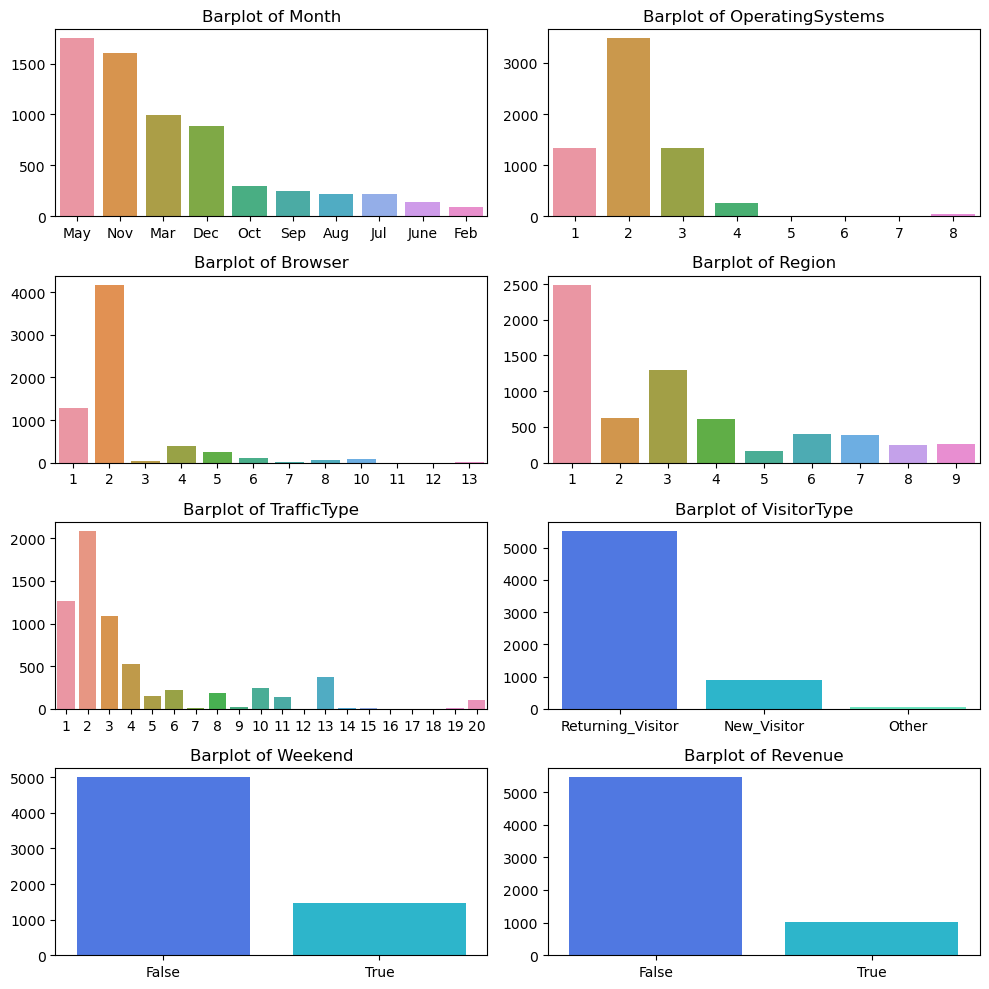

In [14]:
sns.set_palette("rainbow")
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 10))

for cat in enumerate(df_cat):
    i, cat = cat
    sns.barplot(x=list(df_cat["{}".format(cat)].value_counts().index), 
            y=list(df_cat["{}".format(cat)].value_counts().values), data=df_cat, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title("Barplot of {}".format(cat))

plt.tight_layout()
plt.show();

We do some inspection on numerical variables. We notice that the distributions are not symmetric.

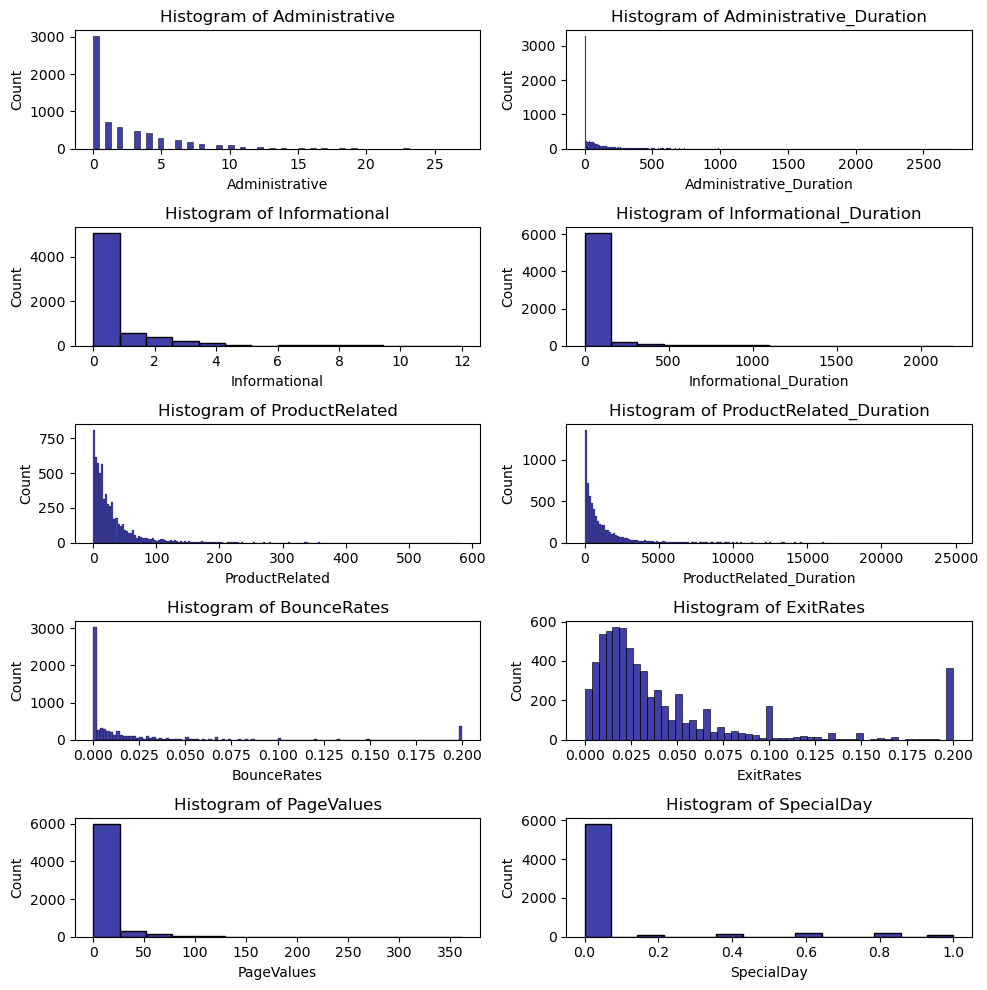

In [15]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10, 10))

for num in enumerate(df_num):
    i, num = num
    sns.histplot(data=df_num, x=num, ax=axes[i//2, i%2], color="darkblue")
    axes[i // 2, i % 2].set_title("Histogram of {}".format(num))

plt.tight_layout()
plt.show();

### Correlation

We want to know which are the most correlated variables.
We start considering if there is a correlation between numerical variables, so we inspect the heatmap.

The most correlated variables are:
* Administrative, Administrative_Duration
* Informational, Informational_Duration
* ProductRelated, ProductRelated_Duration
* BounceRates, ExitRates

<AxesSubplot:>

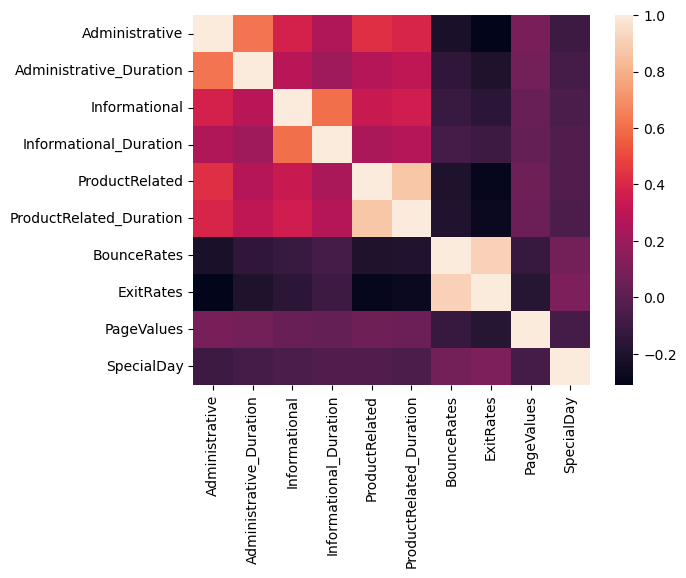

In [16]:
sns.heatmap(training_set.corr())

Now we print a scatterplot for the pairs of variables for which we found a correlation. From these scatterplots it seems that ProductRelated and ProductRelated_Duration have a linear relation, the same can be said for BouceRates and ExitRates.

Text(0, 0.5, 'ExitRates')

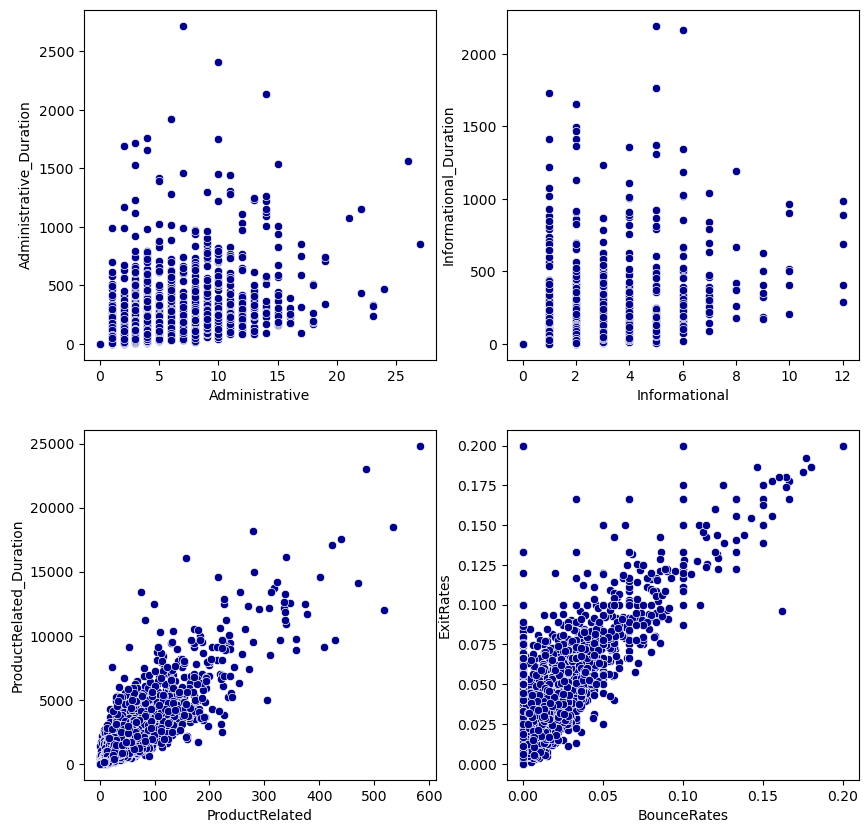

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

sns.scatterplot(data=df_num, x=list(df_num['Administrative']), y=list(df_num['Administrative_Duration']), 
                ax = axes[0, 0], color='darkblue')
axes[0, 0].set_xlabel('Administrative')
axes[0, 0].set_ylabel('Administrative_Duration')

sns.scatterplot(data=df_num, x=list(df_num['Informational']), y=list(df_num['Informational_Duration']), 
                ax = axes[0, 1], color='darkblue')
axes[0, 1].set_xlabel('Informational')
axes[0, 1].set_ylabel('Informational_Duration')

sns.scatterplot(data=df_num, x=list(df_num['ProductRelated']), y=list(df_num['ProductRelated_Duration']), 
                ax = axes[1, 0], color='darkblue')
axes[1, 0].set_xlabel('ProductRelated')
axes[1, 0].set_ylabel('ProductRelated_Duration')

sns.scatterplot(data=df_num, x=list(df_num['BounceRates']), y=list(df_num['ExitRates']), 
                ax = axes[1, 1], color='darkblue')
axes[1, 1].set_xlabel('BounceRates')
axes[1, 1].set_ylabel('ExitRates')

We compute the covariance matrix for the numerical variables. By looking at this matrix, we can observe numerical values that indicate how strong is the relation between the variables.
- "Administrative", "Administrative_Duration", "Informational", "Informational_Duration", "ProductRelated", "ProductRelated_Duration" seem to be correlated and also "PageValues" shows high covariance values with respect to them.

In [18]:
cont = training_set[["Administrative", "Administrative_Duration", "Informational", "Informational_Duration", 
                        "ProductRelated", "ProductRelated_Duration", "BounceRates", "ExitRates", "PageValues", "SpecialDay"]]
cov_matrix = np.cov(cont, rowvar=False)
cov_matrix = pd.DataFrame(cov_matrix, columns=cont.columns, index=cont.columns)
cov_matrix

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
Administrative,10.793809,342.842941,1.550955,115.940720,61.627340,2.275884e+03,-0.034651,-0.049029,5.672001,-0.063255
Administrative_Duration,342.842941,28521.763416,60.571262,4731.749048,1994.072963,9.155185e+04,-1.163875,-1.684167,246.884818,-2.368477
Informational,1.550955,60.571262,1.547486,101.005169,18.361374,7.866018e+02,-0.006661,-0.009403,0.908592,-0.012068
Informational_Duration,115.940720,4731.749048,101.005169,18001.362419,1418.318802,6.538297e+04,-0.471462,-0.670823,74.755367,-0.938230
ProductRelated,61.627340,1994.072963,18.361374,1418.318802,1915.008175,6.761608e+04,-0.429875,-0.620550,44.194896,-0.330957
ProductRelated_Duration,2275.884296,91551.847686,786.601778,65382.973853,67616.077265,3.132660e+06,-16.702687,-22.988968,1745.924531,-15.777183
BounceRates,-0.034651,-1.163875,-0.006661,-0.471462,-0.429875,-1.670269e+01,0.002304,0.002110,-0.106482,0.000706
ExitRates,-0.049029,-1.684167,-0.009403,-0.670823,-0.620550,-2.298897e+01,0.002110,0.002320,-0.156677,0.001029
PageValues,5.672001,246.884818,0.908592,74.755367,44.194896,1.745925e+03,-0.106482,-0.156677,345.000168,-0.258242
SpecialDay,-0.063255,-2.368477,-0.012068,-0.938230,-0.330957,-1.577718e+01,0.000706,0.001029,-0.258242,0.039338


Visualize variances.

In [19]:
variance = np.diag(cov_matrix)
variance = pd.DataFrame(variance, columns=["Variance"], index=cont.columns)
variance

,Variance
Administrative,1.079381e+01
Administrative_Duration,2.852176e+04
Informational,1.547486e+00
Informational_Duration,1.800136e+04
ProductRelated,1.915008e+03
ProductRelated_Duration,3.132660e+06
BounceRates,2.303834e-03
ExitRates,2.319749e-03
PageValues,3.450002e+02
SpecialDay,3.933845e-02


### Focus on the target variable: Revenue

First of all, we take a look at the relation between "Revenue" and categorical variables. By looking at the barplots, it seems that none of the categorical variables clearly influences the Revenue outcome. We plot also the revenue barplot in order to visualize the proportion between its two classes, there's an unbalance with a predomination of class 0.

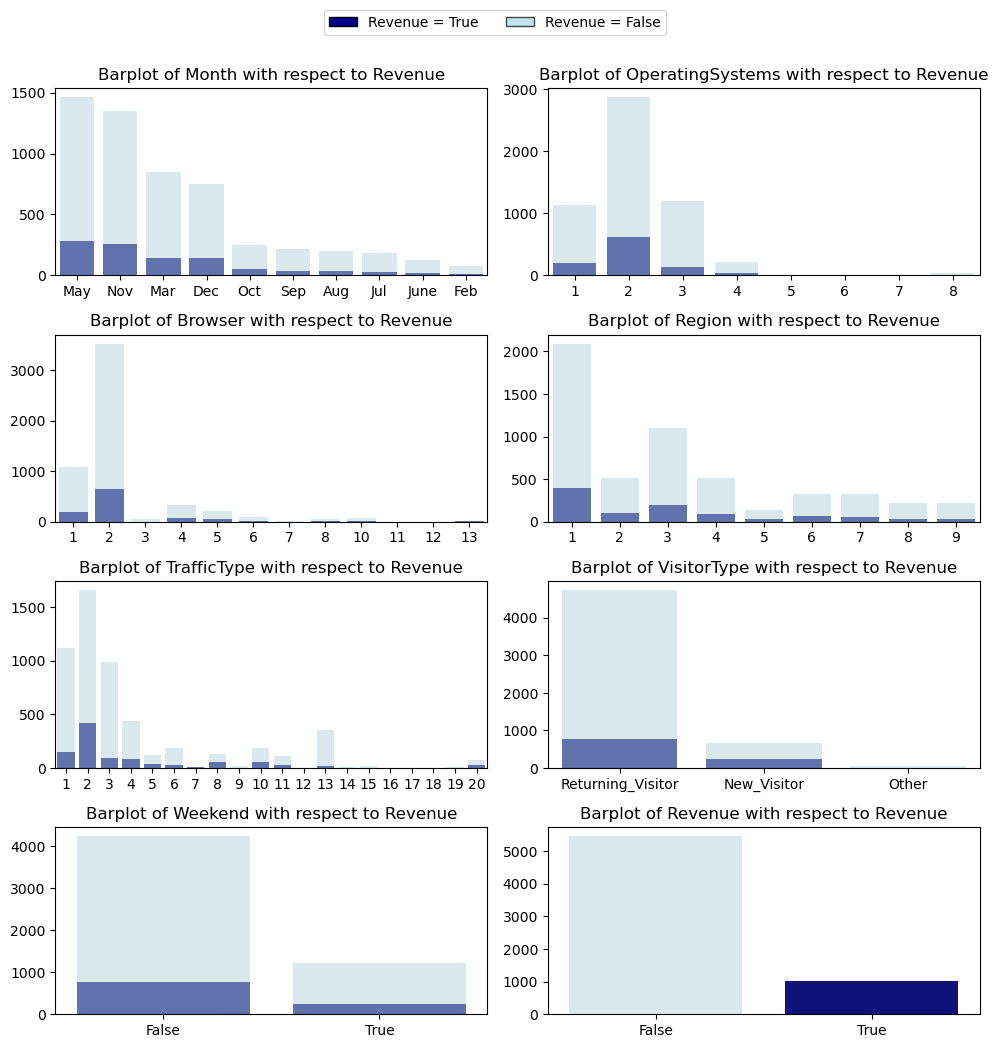

In [20]:
df_cat2 = df_cat.drop(columns=['Revenue'])

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 10))

for cat in enumerate(df_cat):
    i, cat = cat
    sns.barplot(x=list(df_cat[df_cat["Revenue"]==1]["{}".format(cat)].value_counts().index), 
            y=list(df_cat[df_cat["Revenue"]==1]["{}".format(cat)].value_counts().values), data=df_cat, color="darkblue",
           ax=axes[i//2, i%2], label="Revenue 1")
    sns.barplot(x=list(df_cat[df_cat["Revenue"]==0]["{}".format(cat)].value_counts().index), 
            y=list(df_cat[df_cat["Revenue"]==0]["{}".format(cat)].value_counts().values), data=df_cat, color="lightblue", 
            ax=axes[i//2, i%2], label="Revenue 0", alpha=0.5)
    axes[i//2, i%2].set_title("Barplot of {} with respect to Revenue".format(cat))
    

legend_elements = [Patch(facecolor="darkblue", edgecolor="k", label="Revenue = True"),
                   Patch(facecolor="lightblue", edgecolor="k", alpha=0.7, label="Revenue = False")]
fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2)
plt.tight_layout()
plt.show();

After the visual inspection, we apply a chi-squared test to have some numerical data (p-values) about the correlation between "Revenue" and other categorical variables.

In [21]:
p_values = pd.DataFrame(columns=['Variable', 'p-value', 'p < 0.01'])
for cat in df_cat2:
    chi, p, df, expected = chi2_contingency(pd.crosstab(df_cat['Revenue'], df_cat[cat])) 
    if p < 0.01:
        asx = "**"
    else:
        asx = ""
    p_values = pd.concat([p_values, pd.DataFrame({'Variable': [cat], 'p-value': [p], 'p < 0.01': [asx]})], ignore_index=True)

p_values

,Variable,p-value,p < 0.01
0,Month,8.903562e-01,
1,OperatingSystems,8.104193e-07,**
2,Browser,2.245680e-01,
3,Region,4.525631e-01,
4,TrafficType,6.729838e-28,**
5,VisitorType,5.265576e-18,**
6,Weekend,3.175691e-01,


Now, we compare "Revenue=1" and "Revenue=0" with respect to numerical variables, using boxplots. By looking at them, we see that some variables may influence more the "Revenue" response.

* Informational $\rightarrow$ Revenue = 1
* ExitRates $\rightarrow$ Revenue = 0
* PageValues $\rightarrow$ Revenue = 1

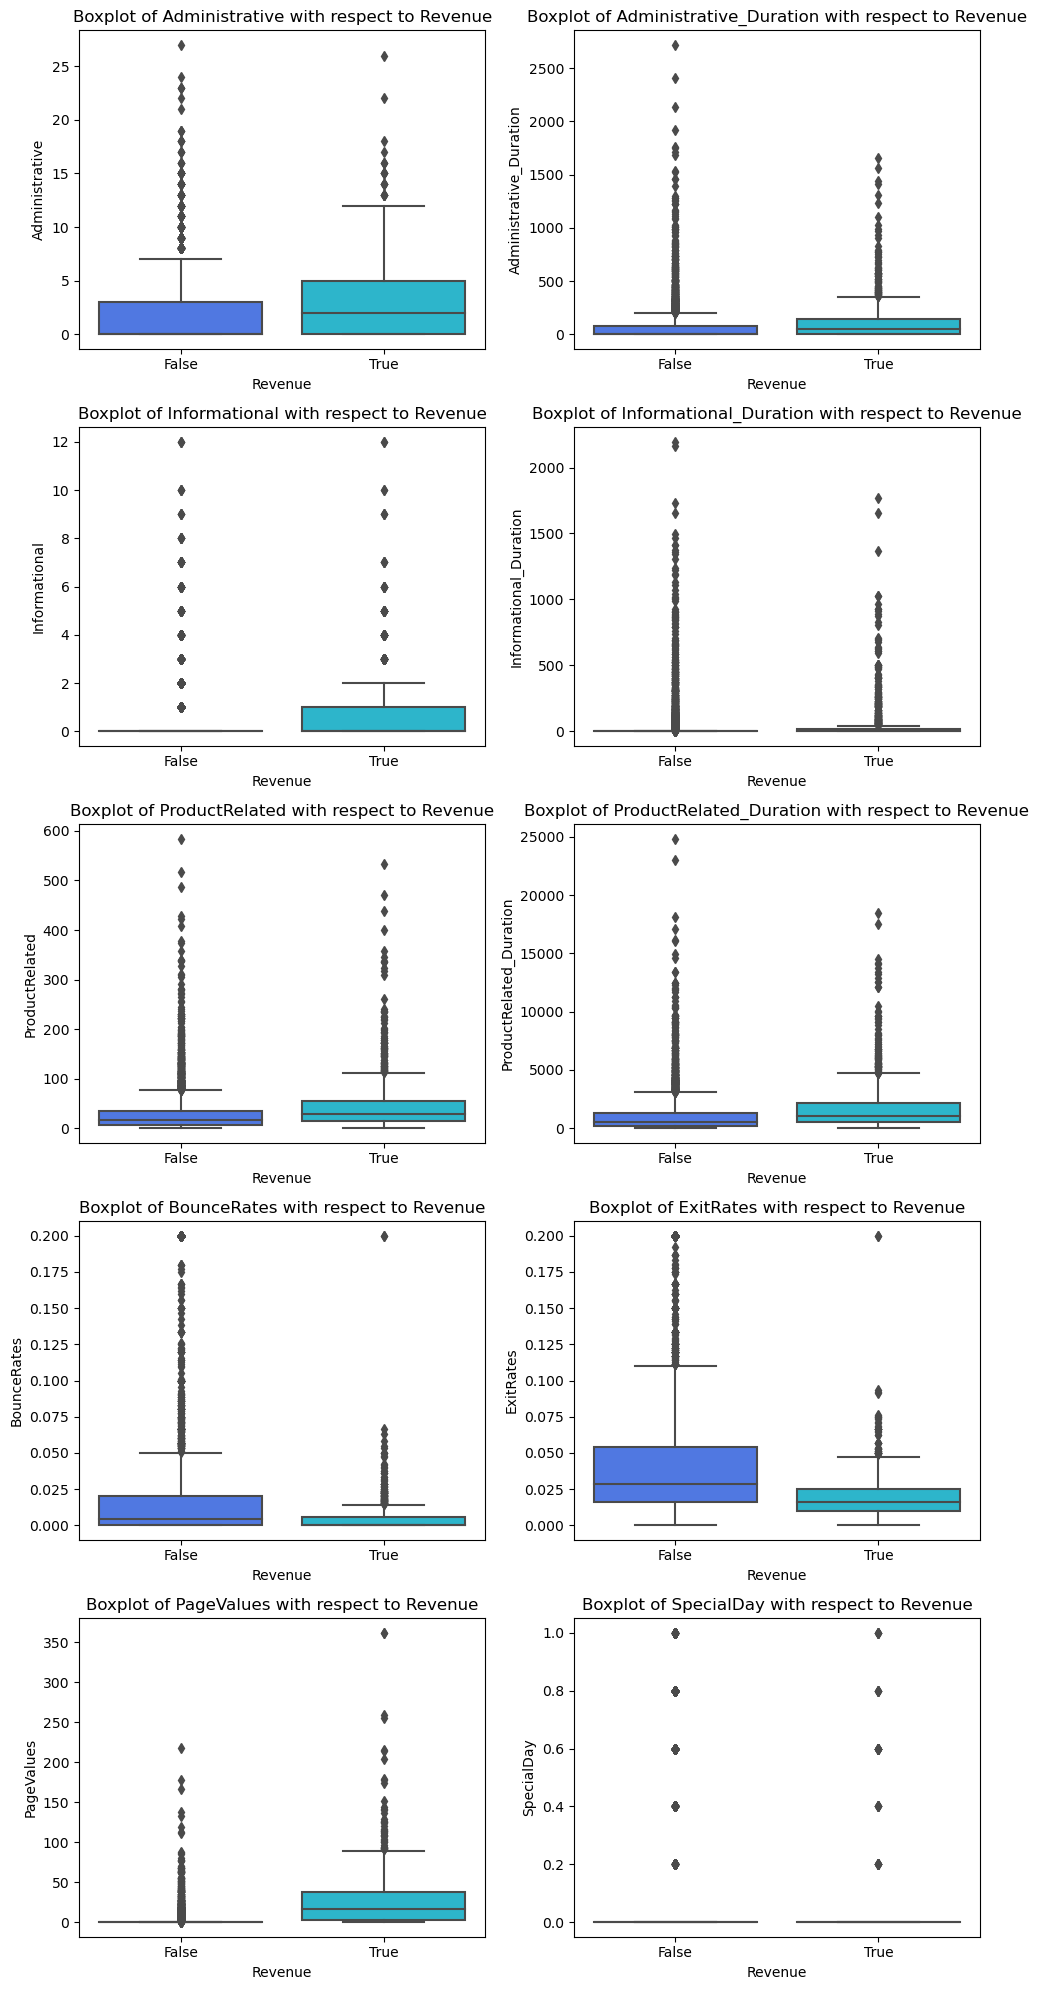

In [22]:
sns.set_palette("rainbow")
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10, 20))

for num in enumerate(df_num):
    i, num = num
    sns.boxplot(x="Revenue", y="{}".format(num), data=training_set, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title("Boxplot of {} with respect to Revenue".format(num))

plt.tight_layout()
plt.show();

After the visual inspection, we apply an anova test to have some numerical data (p-values) about the correlation between "Revenue" and the numerical variables.

The p-values resulted from the anova test are very low for each variable. A possible explanation can be that above we saw that a lot of variables have high covariance values, so most of them are correlated. This explains why "Revenue" seems to be highly correlated with all the numerical variables.

In [23]:
p_values = pd.DataFrame(columns=['Variable', 'p-value', 'p < 0.001'])
for num in df_num:
    true = training_set[training_set['Revenue'] == 1][num]
    false = training_set[training_set['Revenue'] == 0][num]
    f_statistic, p = f_oneway(true, false)
    if p < 0.001:
        asx = "***"
    else:
        asx = ""
    p_values = pd.concat([p_values, pd.DataFrame({'Variable': [num], 'p-value': [p], 'p < 0.001': [asx]})], ignore_index=True)

p_values

,Variable,p-value,p < 0.001
0,Administrative,6.217574e-23,***
1,Administrative_Duration,4.993033e-14,***
2,Informational,2.022965e-13,***
3,Informational_Duration,4.846089e-07,***
4,ProductRelated,2.589077e-33,***
5,ProductRelated_Duration,5.808104e-36,***
6,BounceRates,1.705901e-34,***
7,ExitRates,3.391528e-64,***
8,PageValues,0.000000e+00,***
9,SpecialDay,7.453331e-13,***


### Focus on the target variable: ExitRates

The other variable that deserves a special treatment is "ExitRates", because some values (now removed) are missing and so the next step of our analysis will be to make a regression using the remaining variables in order to predict missing values of "ExitRates". We start by visualizing the influence of categorical variables on "ExitRates" through boxplots.

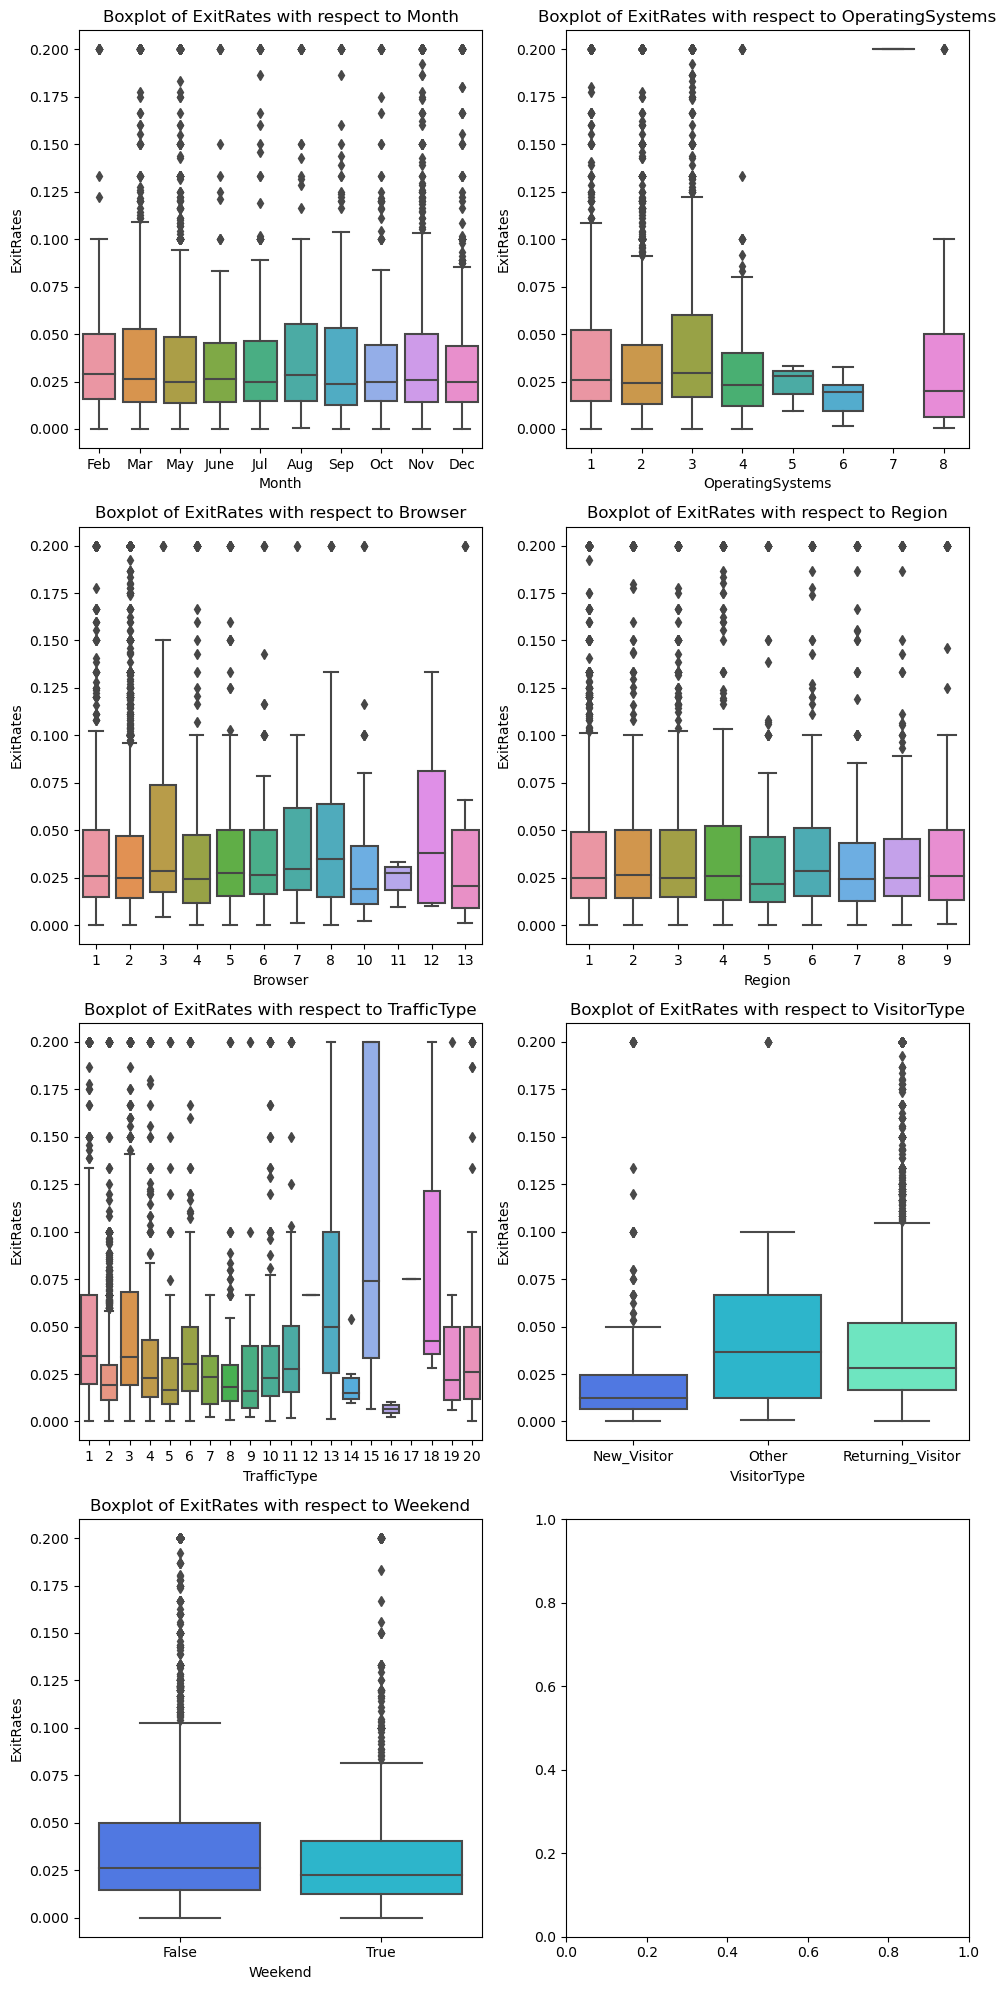

In [24]:
sns.set_palette("rainbow")

# We build a grid 4x2, but we have only 7 features, so one of the box will be empty
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 20))

for cat in enumerate(df_cat2):
    i, cat = cat
    sns.boxplot(x="{}".format(cat), y="ExitRates", data=training_set, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title("Boxplot of ExitRates with respect to {}".format(cat))

plt.tight_layout()
plt.show();

We noticed that among the classes of almost every categorical variable boxplots are more or less equals and this might mean that those variables are not determinant to predict "ExitRates" values. Exceptions for "OperatingSystems", "TrafficType" and "VisitorType".

Regarding numerical variables, we perform a Spearman correlation test and show the results.

In [25]:
df_num2 = df_num.drop(columns=["ExitRates"])

p_values = pd.DataFrame(columns=['Variable', 'rho', 'p-value', 'p < 0.001 and |rho| > 0.4'])
for num in df_num2:
    corr, p = spearmanr(df_num['ExitRates'], df_num2[num])
    if p < 0.001 and abs(corr) > 0.4:
        asx = "***"
    else:
        asx = ""
    p_values = pd.concat([p_values, pd.DataFrame({'Variable': [num], 'rho': [corr], 'p-value': [p], 'p < 0.001 and |rho| > 0.4': [asx]})], ignore_index=True)
    
p_values

,Variable,rho,p-value,p < 0.001 and |rho| > 0.4
0,Administrative,-0.420609,1.245018e-275,***
1,Administrative_Duration,-0.425344,1.747292e-282,***
2,Informational,-0.170708,1.781219e-43,
3,Informational_Duration,-0.184810,8.896178e-51,
4,ProductRelated,-0.516527,0.000000e+00,***
5,ProductRelated_Duration,-0.472244,0.000000e+00,***
6,BounceRates,0.602104,0.000000e+00,***
7,PageValues,-0.307470,1.297023e-141,
8,SpecialDay,0.145920,4.165174e-32,


## 1.2 Variance selection

- Standardization of numerical variables.
- Application of a filter based on variance. Variables that have a variance under a certain threshold are filtered out in order to avoid columns filled with zeros or with almost equal values, because they wouldn't bring any useful information.

In [26]:
training_set = training_set_reg
X_train = training_set.drop(columns=['ExitRates','Revenue'])
y_train = training_set['ExitRates']

scaler = StandardScaler()
X_train[numeric_features_noExit] = scaler.fit_transform(X_train[numeric_features_noExit])

In [27]:
threshold = 0.0075
variance_selector = VarianceThreshold(threshold=threshold)

X_train = X_train.loc[:, variance_selector.fit(X_train).get_support()]
columns_remaining = X_train.columns.tolist()
print("Features: ", X_train.columns.tolist())
print("Number of features: ", len(columns_remaining))

Features:  ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'PageValues', 'SpecialDay', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep', 'OperatingSystems_1', 'OperatingSystems_2', 'OperatingSystems_3', 'OperatingSystems_4', 'Browser_1', 'Browser_2', 'Browser_4', 'Browser_5', 'Browser_6', 'Browser_8', 'Browser_10', 'Region_1', 'Region_2', 'Region_3', 'Region_4', 'Region_5', 'Region_6', 'Region_7', 'Region_8', 'Region_9', 'TrafficType_1', 'TrafficType_2', 'TrafficType_3', 'TrafficType_4', 'TrafficType_5', 'TrafficType_6', 'TrafficType_8', 'TrafficType_10', 'TrafficType_11', 'TrafficType_13', 'TrafficType_20', 'VisitorType_New_Visitor', 'VisitorType_Returning_Visitor', 'Weekend_False', 'Weekend_True']
Number of features:  54


Plot of the histogram in order to have an idea of distribution of the "ExitRates" variable. By looking at the plot, it seems quite asymmetrical, with peaks on the first values.

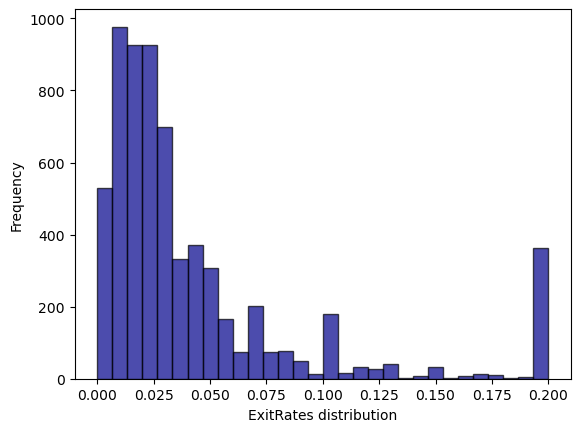

In [28]:
plot = plt.hist(np.array(y_train), bins=30, color="darkblue", edgecolor='black', alpha=0.7)

x_lab = plt.xlabel('ExitRates distribution')
y_lab = plt.ylabel('Frequency')

plt.show(plot)
plt.show(x_lab)
plt.show(y_lab)

## 1.3 Regression

We make our regression analysis in this way:
- Polynomial regression
- Linear regression
- Improvements in accuracy (Ridge and Lasso) and in interpretability (Forward stepwise selection)

In each step, performances of the models are evaluated using:
- MSE (Mean Squared Error)
- RMSE (Root Mean Squared Error)
- $R^2$

These scores are obtained through cross-validation.

## 1.4 Linear and polynomial regression

We check which is the best model along different degrees of polynomial regression. We find out that the best solution, considering all the variables, is the linear one (degree = 1).

In [29]:
r2_scorer = make_scorer(r2_score, greater_is_better=True)

model = Pipeline([('poly', PolynomialFeatures(degree=1, include_bias=False)),
                  ('linear', LinearRegression(fit_intercept=True))])
parameters = {'poly__degree': list(range(1,3))}

cv = KFold(n_splits=5, random_state=42, shuffle=True)
model_cv = GridSearchCV(model, parameters, scoring=r2_scorer, cv=cv, refit=True)
model_cv.fit(X_train, y_train)
best_polynomial_model = model_cv.best_estimator_
print("Best Hyperparameters:", model_cv.best_params_)
print("Best R-squared Score:", model_cv.best_score_)

Best Hyperparameters: {'poly__degree': 1}
Best R-squared Score: 0.8610969937222601


Once assessed that the linear regression model with degree equal to 1 is the best one among different degrees, we train that model with all the variables. Then, we will try to improve this result using Ridge, Lasso or Forward Stepwise Selection.

In [30]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

cv = KFold(n_splits=5, random_state=42, shuffle=True)
MSE_lin_reg = cross_val_score(lin_reg, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
MSE_lin_reg = np.mean(-MSE_lin_reg)
RMSE_lin_reg = np.sqrt(MSE_lin_reg)
r2_lin_reg = cross_val_score(lin_reg, X_train, y_train, cv=cv, scoring='r2')
r2_lin_reg = np.mean(r2_lin_reg)

print("Mean Squared Error:", MSE_lin_reg)
print("R-squared:", r2_lin_reg)

Mean Squared Error: 0.00032128847411695184
R-squared: 0.8611134150681696


Plot of the residuals for linear regression, to assess if our regression hypotheses are correct. The plot shows no particular pattern, residuals seem to be random distributed around zero, so the assumptions are not violated.

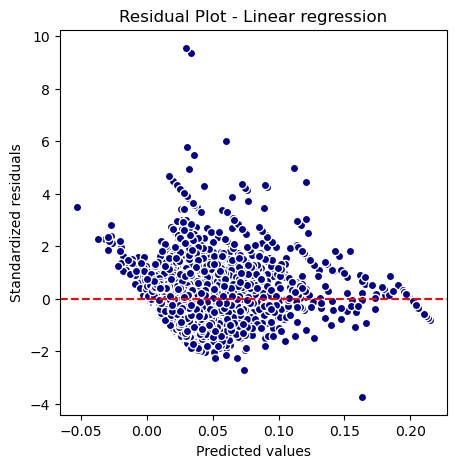

In [31]:
predicted_values = lin_reg.predict(X_train)
residuals = y_train - predicted_values
standardized_residuals = (residuals - np.mean(residuals)) / np.std(residuals)

plt.figure(figsize=(5, 5))
plt.scatter(predicted_values, standardized_residuals, color='darkblue', edgecolor='white')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Standardized residuals')
plt.title('Residual Plot - Linear regression')
plt.show()

## 1.5 Improvements of linear regression

We now try to improve linear regression performance by using shrinkage methods (to improve accuracy) and feature selection (to improve interpretability).

### Ridge regression

In [32]:
param_grid = {
    'ridge__alpha': [0.01, 0.1, 1.0, 10.0]
}

pipeline = Pipeline([
    ('ridge', Ridge())
])

cv = KFold(n_splits=5, random_state=42, shuffle=True)

grid_search = GridSearchCV(pipeline, param_grid, cv=cv)
grid_search.fit(X_train, y_train)
best_alpha = grid_search.best_params_['ridge__alpha']
best_estimator = grid_search.best_estimator_
print("Best alpha:", best_alpha)

Best alpha: 10.0


In [33]:
best_model_ridge = grid_search.best_estimator_

MSE_ridge = cross_val_score(best_model_ridge, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
MSE_ridge = np.mean(-MSE_ridge)
RMSE_ridge = np.sqrt(MSE_ridge)
r2_ridge = cross_val_score(best_model_ridge, X_train, y_train, cv=cv, scoring='r2')
r2_ridge = np.mean(r2_ridge)

print("Mean Squared Error:", MSE_ridge)
print("R-squared:", r2_ridge)

Mean Squared Error: 0.0003211857227726093
R-squared: 0.861156119043182


Plot of the residuals for linear regression with Ridge, to assess if our regression hypotheses are correct. The plot shows no particular pattern, residuals seem to be random distributed, so the assumptions are not violated.

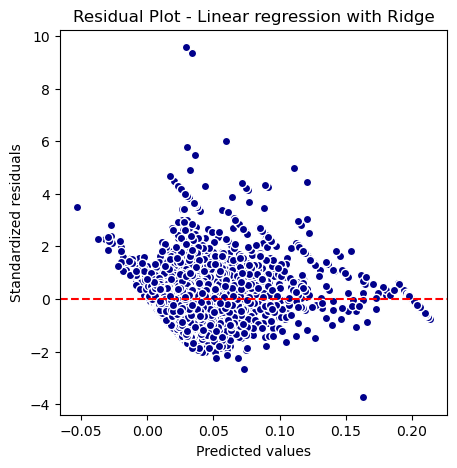

In [34]:
predicted_values = best_model_ridge.predict(X_train)
residuals = y_train - predicted_values
standardized_residuals = (residuals - np.mean(residuals)) / np.std(residuals)

plt.figure(figsize=(5, 5))
plt.scatter(predicted_values, standardized_residuals, color='darkblue', edgecolor='white')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Standardized residuals')
plt.title('Residual Plot - Linear regression with Ridge')
plt.show()

### Lasso

In [35]:
param_grid = {
    'lasso__alpha': [0.0005, 0.001, 0.01, 0.1, 1.0, 10.0] 
}

pipeline = Pipeline([
    ('lasso', Lasso())
])

cv = KFold(n_splits=5, random_state=42, shuffle=True)

grid_search = GridSearchCV(pipeline, param_grid, cv=cv)
grid_search.fit(X_train, y_train)
best_alpha = grid_search.best_params_['lasso__alpha']
best_estimator = grid_search.best_estimator_
print("Best alpha:", best_alpha)

Best alpha: 0.0005


In [36]:
best_model_lasso = grid_search.best_estimator_

MSE_lasso = cross_val_score(best_model_lasso, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
MSE_lasso = np.mean(-MSE_lasso)
RMSE_lasso = np.sqrt(MSE_lasso)
r2_lasso = cross_val_score(best_model_lasso, X_train, y_train, cv=cv, scoring='r2')
r2_lasso = np.mean(r2_lasso)

print("Mean Squared Error:", MSE_lasso)
print("R-squared:", r2_lasso)

print("Number of features maintained:", np.count_nonzero(np.array(best_estimator.named_steps['lasso'].coef_)))

non_zero_coeffs = best_model_lasso.named_steps['lasso'].coef_ != 0
features = X_train.columns[non_zero_coeffs]

features

Mean Squared Error: 0.0003277673456211589
R-squared: 0.8583211625837898
Number of features maintained: 9


Index(['Administrative', 'Administrative_Duration', 'ProductRelated',
       'BounceRates', 'PageValues', 'SpecialDay', 'OperatingSystems_2',
       'TrafficType_2', 'VisitorType_New_Visitor'],
      dtype='object')

Plot of the residuals for linear regression with Lasso, to assess if our regression hypotheses are correct. The plot shows no particular pattern, residuals seem to be random distributed, so the assumptions are not violated.

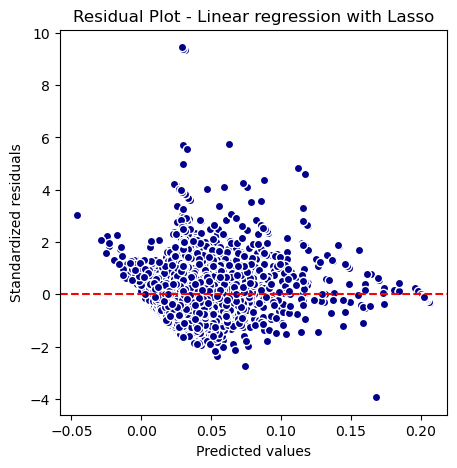

In [37]:
predicted_values = best_model_lasso.predict(X_train)
residuals = y_train - predicted_values
standardized_residuals = (residuals - np.mean(residuals)) / np.std(residuals)

plt.figure(figsize=(5, 5))
plt.scatter(predicted_values, standardized_residuals, color='darkblue', edgecolor='white')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Standardized residuals')
plt.title('Residual Plot - Linear regression with Lasso')
plt.show()

### Linear regression vs linear regression with Ridge and Lasso

To perform an accurate evaluation of the models we compute the RMSE (Root Mean Squared Error) through 5-fold cross validation. Results are very similar. So, Ridge doesn't improve the results, while maybe we can consider Lasso because it gives the same results of simple linear regression, but it performs feature selection, keeping only 9 features.

In [38]:
print("Linear regression RMSE: ", RMSE_lin_reg)
print("Linear regression with Ridge RMSE: ", RMSE_ridge)
print("Linear regression with Lasso RMSE: ", RMSE_lasso)

Linear regression RMSE:  0.017924521586836058
Linear regression with Ridge RMSE:  0.01792165513485318
Linear regression with Lasso RMSE:  0.01810434604235013


### Forward stepwise selection

We now perform forward stepwise selection on the simple linear regression model. The best Mk models resulted from each step are compared through cross validated $R^2$.

In [39]:
def get_evaluator(scorer):
    def evaluator(model, X, y, trained=False):
        if not trained:
            model = model.fit(X, y)
        score = scorer(model, X, y)
        return model, score
    return evaluator   

def get_cv_evaluator(scorer, cv=3):
    def evaluator(model, X, y, trained=False):            
        scores = cross_val_score(model, X, y, scoring=scorer, cv=cv)
        if not trained:
            model = model.fit(X, y)
        return model, np.mean(scores)
    return evaluator

# Definition of helper functions to generalize forward stepwise selection for different algorithms
def get_logistic_model(solver, penalty, max_iter=1000):
    def logistic_model():
        model = LogisticRegression(solver=solver, penalty=penalty,max_iter=max_iter)
        return model
    return logistic_model

def get_LDA_model():
    def LDA_model():
        model = LDA()
        return model
    return LDA_model

def get_QDA_model():
    def QDA_model():
        model = QDA()
        return model
    return QDA_model

def get_linear_regression_model(fit_intercept=True):
    def linear_regression_model():
        model = LinearRegression(fit_intercept=fit_intercept)
        return model
    return linear_regression_model

def get_SVM_model(kernel,C,max_iter=1000):
    def SVM_model():
        if kernel == 'linear':
            model = LinearSVC(C=C,max_iter=max_iter)
        else:
            model = SVC(kernel=kernel,C=C,max_iter=max_iter)
        return model
    return SVM_model


def forward_selection(Xtrain_pd, ytrain, model_chosen,
                      candidates_evaluator, candidates_argbest, 
                      subsets_evaluator, subsets_argbest,       
                      candidates_scorer_name=None,  
                      subsets_scorer_name=None,     
                      verbose=True, weight_step3=0):   
    
    
    num_features = Xtrain_pd.shape[-1]
    best_candidate_metric = []
    subsets_metric = []        
    subsets_best_features = [] 
    num_evaluations = 0        
    
    selected_features = []
    all_features = Xtrain_pd.columns
    
    
    # Train M0
    model = DummyRegressor()
    model, score = candidates_evaluator(model, Xtrain_pd[[]], ytrain)
    best_candidate_metric.append(score)
    subsets_best_features.append([])
    _, score = subsets_evaluator(model, Xtrain_pd[[]], ytrain, trained=True)
    subsets_metric.append(score)
    
    
    for dim in range(num_features):
        candidate_metrics = [] 
        candidate_models = []  
        
        remaining_features = all_features.difference(selected_features)
        
        # fit all the models with k features
        for new_column in remaining_features:
            Xtrain_sub = Xtrain_pd[selected_features+[new_column]].to_numpy()
            model = model_chosen()
            model, score = candidates_evaluator(model, Xtrain_sub, ytrain)
            candidate_models.append(model)
            candidate_metrics.append(score)
            num_evaluations += 1
            
        
        idx_best_candidate = candidates_argbest(candidate_metrics) # select the best Mk model
        selected_features.append(remaining_features[idx_best_candidate]) # update selected feature
        best_candidate_metric.append(candidate_metrics[idx_best_candidate]) # save best candidate features
        best_features = selected_features.copy()
        subsets_best_features.append(best_features)
        
        
        # Comparison of all the best models
        best_subset_model = candidate_models[idx_best_candidate] # save the best model
        best_subset_Xtrain = Xtrain_pd[best_features].to_numpy()
        _, score = subsets_evaluator(best_subset_model, best_subset_Xtrain, ytrain, trained=True)
        subsets_metric.append(score) # computing the metrics for the training set
        num_evaluations += weight_step3 
        
        if verbose:
            print("............")
            print("Best model (M{}) with {} features: {}".format(dim+1, dim+1, best_features))
            print("M{} subset score (3.): {}".format(dim+1, score))
        
    # Choose the best candidates
    best_subset_idx = subsets_argbest(subsets_metric)
    best_features = subsets_best_features[best_subset_idx]
    
    print("\nBest configuration has {} features".format(best_subset_idx))
    print("Features: {}".format(subsets_best_features[best_subset_idx]))
    
    best_candidate_score_idx = candidates_argbest(best_candidate_metric)
    return best_features  

In [40]:
cv = KFold(n_splits=5, random_state=42, shuffle=True)
features_lin_reg = forward_selection(X_train, y_train, get_linear_regression_model(fit_intercept=True),
                  get_evaluator(make_scorer(r2_score)), np.argmax, 
                  get_cv_evaluator(make_scorer(r2_score), cv), np.argmax,
                  candidates_scorer_name="R^2",
                  subsets_scorer_name="R^2 (CV)",
                  verbose=False, weight_step3=cv.n_splits)


Best configuration has 20 features
Features: ['BounceRates', 'Administrative', 'ProductRelated', 'VisitorType_New_Visitor', 'PageValues', 'TrafficType_2', 'OperatingSystems_2', 'SpecialDay', 'TrafficType_4', 'Month_June', 'OperatingSystems_3', 'TrafficType_3', 'TrafficType_13', 'TrafficType_1', 'Month_Dec', 'Region_7', 'VisitorType_Returning_Visitor', 'ProductRelated_Duration', 'Month_Nov', 'Month_Jul']


In [41]:
best_model_forward = LinearRegression(fit_intercept=True)
best_model_forward = best_model_forward.fit(X_train[features_lin_reg],y_train)

MSE_forward = cross_val_score(best_model_forward, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
MSE_forward = np.mean(-MSE_forward)
RMSE_forward = np.sqrt(MSE_forward)
r2_forward = cross_val_score(best_model_forward, X_train, y_train, cv=cv, scoring='r2')
r2_forward = np.mean(r2_forward)

print("Mean Squared Error:", MSE_forward)
print("R-squared:", r2_forward)

Mean Squared Error: 0.00032128847411695184
R-squared: 0.8611134150681696


Plot of the residuals for linear regression with forward stepwise selection, to assess if our regression hypotheses are correct. The plot shows no particular pattern, residuals seem to be random distributed, so the assumptions are not violated.

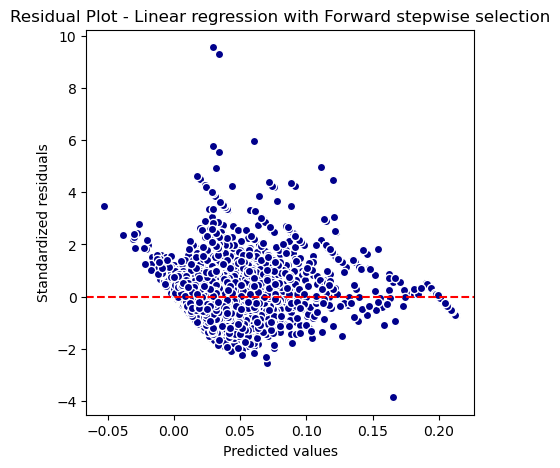

In [42]:
predicted_values = best_model_forward.predict(X_train[features_lin_reg])
residuals = y_train - predicted_values
standardized_residuals = (residuals - np.mean(residuals)) / np.std(residuals)

plt.figure(figsize=(5, 5))
plt.scatter(predicted_values, standardized_residuals, color='darkblue', edgecolor='white')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Standardized residuals')
plt.title('Residual Plot - Linear regression with Forward stepwise selection')
plt.show()

## 1.6 KNN algorithm

We now repeat the analysis using a non parametric model, the K-Nearest Neighbors. This algorithm has problems when the dimension of the dataset is too high (curse of dimensionality), so we use it involving only the 9 numerical variables.

In [43]:
X_train_num = df_num.drop(columns='ExitRates')
y_train_num = df_num['ExitRates']

scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num)

In [44]:
cv = KFold(n_splits=5, random_state=42, shuffle=True)

params = {'n_neighbors': range(1, 30)}

KNR = KNeighborsRegressor()
KNR_cv = GridSearchCV(KNR, params, refit=True, cv=cv, scoring='r2')
KNR_cv.fit(X_train_num_scaled, y_train)
print("Best number of neighbours: {}".format(KNR_cv.best_params_['n_neighbors']))

knn_regressor = KNeighborsRegressor(n_neighbors=KNR_cv.best_params_['n_neighbors'])
MSE_KNN = cross_val_score(knn_regressor, X_train_num_scaled, y_train_num, cv=cv, scoring='neg_mean_squared_error')
MSE_KNN = np.mean(-MSE_KNN)
RMSE_KNN = np.sqrt(MSE_KNN)
r2_KNN = cross_val_score(knn_regressor, X_train_num_scaled, y_train_num, cv=cv, scoring='r2')
mean_r2_KNN = r2_KNN.mean()

print("Mean Squared Error:", MSE_KNN)
print("R^2:", mean_r2_KNN)

Best number of neighbours: 12
Mean Squared Error: 0.0002299657027550059
R^2: 0.9006090320301203


Plot of the residuals for KNN, to assess if our regression hypotheses are correct. The plot shows no particular pattern, residuals seem to be random distributed, so the assumptions are not violated.

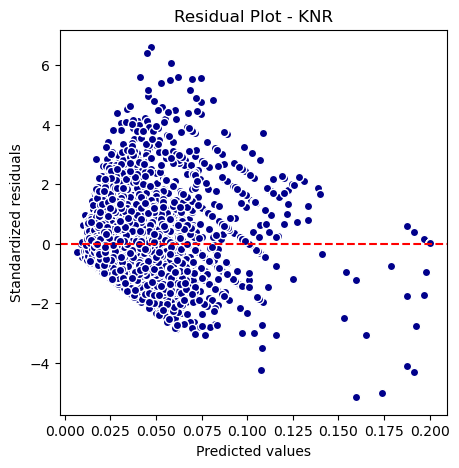

In [45]:
knn_regressor = knn_regressor.fit(X_train_num,y_train)
predicted_values = knn_regressor.predict(X_train_num)
residuals = y_train - predicted_values
standardized_residuals = (residuals - np.mean(residuals)) / np.std(residuals)

plt.figure(figsize=(5, 5))
plt.scatter(predicted_values, standardized_residuals, color='darkblue', edgecolor='white')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Standardized residuals')
plt.title('Residual Plot - KNR')
plt.show()

## 1.7 Models comparison

We observe that all the $R^2$ values are almost the same and so we first decide to exclude models with a high number of features, simple linear regression and linear regression with Ridge. Regarding linear regression with Lasso or with Forward feature selection, we choose Lasso because it uses a lower number of features and, comparing variables maintained by these two models, we see that features that seemed significant from the analysis of the dataset are present in both.

Finally, we notice that KNN has the highest $R^2$, but its residual plot is worse than the one of Lasso. Furthermore, KNN makes an analysis without considering any of the categorical variables. 

For this reason, we establish that the best regression model is linear regression with Lasso.

In [46]:
data = [[MSE_lin_reg, RMSE_lin_reg, r2_lin_reg, 54], 
        [MSE_ridge, RMSE_ridge, r2_ridge, 54],
        [MSE_lasso, RMSE_lasso, r2_lasso, 9],
        [MSE_forward, RMSE_forward, r2_forward, 20],
        [MSE_KNN, RMSE_KNN, mean_r2_KNN, 9]]

comparison = pd.DataFrame(data, columns=['MSE', 'RMSE', 'R2', 'N. features'], index=['Linear', 'Ridge', 'Lasso', 'Forward', 'KNN'])
comparison

,MSE,RMSE,R2,N. features
Linear,0.000321,0.017925,0.861113,54
Ridge,0.000321,0.017922,0.861156,54
Lasso,0.000328,0.018104,0.858321,9
Forward,0.000321,0.017925,0.861113,20
KNN,0.000230,0.015165,0.900609,9


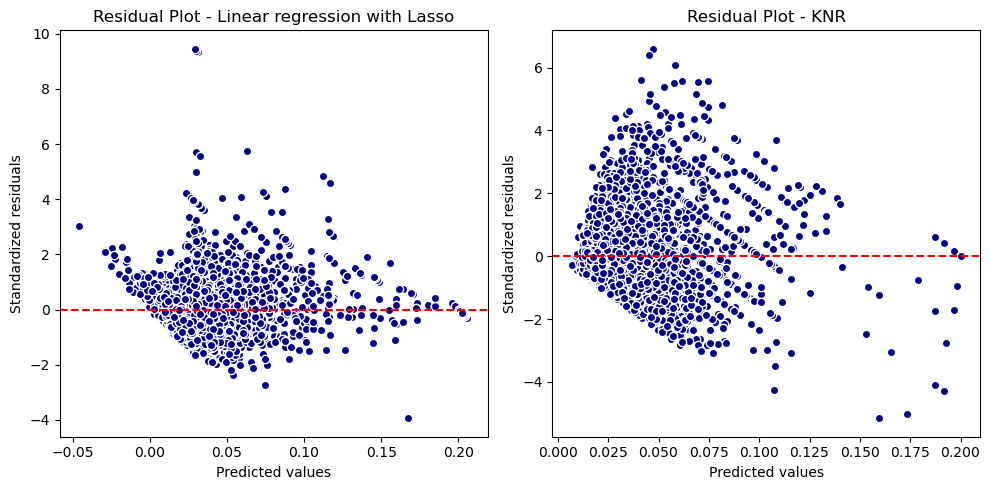

In [47]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

predicted_values = best_model_lasso.predict(X_train)
residuals = y_train - predicted_values
standardized_residuals = (residuals - np.mean(residuals)) / np.std(residuals)
ax1.scatter(predicted_values, standardized_residuals, color='darkblue', edgecolor='white')
ax1.axhline(y=0, color='red', linestyle='--')
ax1.set_xlabel('Predicted values')
ax1.set_ylabel('Standardized residuals')
ax1.set_title('Residual Plot - Linear regression with Lasso')

knn_regressor = knn_regressor.fit(X_train_num,y_train)
predicted_values = knn_regressor.predict(X_train_num)
residuals = y_train - predicted_values
standardized_residuals = (residuals - np.mean(residuals)) / np.std(residuals)
ax2.scatter(predicted_values, standardized_residuals, color='darkblue', edgecolor='white')
ax2.axhline(y=0, color='red', linestyle='--')
ax2.set_xlabel('Predicted values')
ax2.set_ylabel('Standardized residuals')
ax2.set_title('Residual Plot - KNR')

plt.tight_layout()
plt.show()

## 1.8 Filling missing values

We use training_set_complete because this dataset contains also NA values on the "ExitRates" columns. We want to "fill" these cells with predictions obtained by the best model chosen.

In [48]:
scaler = StandardScaler()
missing_values[numeric_features_noExit] = scaler.fit_transform(missing_values[numeric_features_noExit])

X_missing = missing_values[columns_remaining]

values = best_model_lasso.predict(X_missing)
values = np.where(values < 0, 0, values)
values = np.where(values > 1, 1, values)
training_set_complete.loc[:,'ExitRates'] = training_set_complete.loc[:,'ExitRates'].fillna(pd.Series(values,missing_values.index))
training_set_complete

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True
0,0,0.000000,0,0.0,5,19.000000,0.000000,0.080000,0.000000,0.6,...,0,0,0,0,0,0,0,1,1,0
1,5,158.700000,0,0.0,51,1364.266667,0.007692,0.011987,0.000000,0.0,...,0,0,0,0,0,0,0,1,0,1
2,7,87.916667,1,0.0,46,1621.025379,0.004082,0.020544,6.023523,0.0,...,0,0,0,0,0,0,0,1,1,0
3,1,4.000000,0,0.0,37,1296.942857,0.013889,0.038612,0.000000,0.8,...,0,0,0,0,0,0,0,1,1,0
4,2,132.400000,0,0.0,11,296.300000,0.000000,0.020974,0.000000,0.0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9243,10,130.550000,1,23.2,7,128.233333,0.006667,0.015238,0.000000,0.0,...,0,0,0,0,0,1,0,0,1,0
9244,14,260.736111,3,186.5,51,2921.902778,0.013661,0.029891,8.339172,0.0,...,0,0,0,0,0,0,0,1,0,1
9245,7,109.500000,0,0.0,25,349.696970,0.000000,0.019048,0.000000,0.0,...,0,0,0,0,0,0,0,1,1,0
9246,4,82.700000,0,0.0,26,405.283333,0.000000,0.017842,0.000000,0.0,...,0,0,0,0,0,1,0,0,1,0


In [49]:
test_set = test_set.drop(columns=['Unnamed: 0'])

test_set['Month']=test_set['Month'].astype('category')
test_set['OperatingSystems']=test_set['OperatingSystems'].astype('category')
test_set['Browser']=test_set['Browser'].astype('category')
test_set['Region']=test_set['Region'].astype('category')
test_set['TrafficType']=test_set['TrafficType'].astype('category')
test_set['VisitorType']=test_set['VisitorType'].astype('category')
test_set['Weekend']=test_set['Weekend'].astype('category')
test_set['Revenue']=test_set['Revenue'].astype('category')

In [50]:
test_set['Browser'] = test_set['Browser'].cat.set_categories(all_categories_browser)
test_set['TrafficType'] = test_set['TrafficType'].cat.set_categories(all_categories_traffic_type)

test_set = pd.get_dummies(test_set, columns=['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType','Weekend'], drop_first=False)

In [51]:
missing_values_test = test_set.copy()
missing_values_test = missing_values_test[missing_values_test['ExitRates'].isna()]

scaler = StandardScaler()
missing_values_test[numeric_features_noExit] = scaler.fit_transform(missing_values_test[numeric_features_noExit])

X_missing_test = missing_values_test[columns_remaining]

values_test = best_model_lasso.predict(X_missing_test)
values_test = np.where(values_test < 0, 0, values_test)
values_test = np.where(values_test > 1, 1, values_test)
test_set.loc[:,'ExitRates'] = test_set.loc[:,'ExitRates'].fillna(pd.Series(values_test,missing_values_test.index))
test_set

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True
0,0,0.0,0,0.0,1,0.000000,0.200000,0.197884,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0
1,0,0.0,0,0.0,2,2.666667,0.050000,0.072096,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0
2,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0
3,0,0.0,0,0.0,7,280.500000,0.000000,0.028571,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0
4,0,0.0,0,0.0,2,68.000000,0.000000,0.030195,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3077,0,0.0,0,0.0,39,1168.619841,0.000000,0.009064,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0
3078,0,0.0,0,0.0,13,1041.750000,0.018182,0.027273,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0
3079,1,5.0,0,0.0,21,411.083333,0.015789,0.016140,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0
3080,0,0.0,1,0.0,16,503.000000,0.000000,0.037647,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0


## 2. CLASSIFICATION

In [52]:
# Setting of training set
training_set = training_set_complete.copy()
training_set['Revenue'] = training_set['Revenue'].astype(int)
test_set['Revenue'] = test_set['Revenue'].astype(int)

## 2.1 Variance selection

We perform the filter step as for regression, in this case on the "complete" dataset, with "ExitRates" values filled. For consistency, we do that also on the test set.

- Standardization of numerical variables.
- Application of a filter based on variance. Variables that have a variance under a certain threshold are filtered out in order to avoid columns filled with zeros or with almost equal values, because they wouldn't bring any useful information.

In [53]:
X_train = training_set.drop(columns=['Revenue'])
X_test = test_set.drop(columns=['Revenue'])
y_train = training_set['Revenue']
y_test = test_set['Revenue']


scaler = StandardScaler()
X_train[numeric_features_Exit] = scaler.fit_transform(X_train[numeric_features_Exit])


threshold = 0.0075
variance_selector = VarianceThreshold(threshold=threshold)

X_train = X_train.loc[:, variance_selector.fit(X_train).get_support()]
columns_remaining = X_train.columns.tolist()
print("Features of training set: ", X_train.columns.tolist())
print("Number of features of training set: ", len(columns_remaining))
X_test = X_test[columns_remaining]

Features of training set:  ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep', 'OperatingSystems_1', 'OperatingSystems_2', 'OperatingSystems_3', 'OperatingSystems_4', 'Browser_1', 'Browser_2', 'Browser_3', 'Browser_4', 'Browser_5', 'Browser_6', 'Browser_8', 'Browser_10', 'Region_1', 'Region_2', 'Region_3', 'Region_4', 'Region_5', 'Region_6', 'Region_7', 'Region_8', 'Region_9', 'TrafficType_1', 'TrafficType_2', 'TrafficType_3', 'TrafficType_4', 'TrafficType_5', 'TrafficType_6', 'TrafficType_8', 'TrafficType_10', 'TrafficType_11', 'TrafficType_13', 'TrafficType_20', 'VisitorType_New_Visitor', 'VisitorType_Returning_Visitor', 'Weekend_False', 'Weekend_True']
Number of features of training set:  56


## 2.2 Functions and algorithms

### Feature selection: Forward stepwise selection

To perform this step, we will use the same algorithm used for regression.

### Accuracy, sensitivity, specificity

In [54]:
def accuracy(y_pred, y_true):
    return (y_pred == y_true).mean()

def calculate_sensitivity_specificity(confusion_matrix):
    # Extract values from the confusion matrix
    TN, FP, FN, TP = confusion_matrix.ravel()

    # Calculate Sensitivity (Recall)
    sensitivity = TP / (TP + FN)

    # Calculate Specificity
    specificity = TN / (TN + FP)

    return sensitivity, specificity

### Evaluation metrics

In [55]:
def classification_metrics_training(model, model_name, X_train, y_train, cv):
    
    # Sensitivity
    sensitivity_train = np.mean(np.absolute(cross_val_score(model, X_train, y_train, cv=cv, scoring='recall', n_jobs=-1)))
    
    # Specificity
    specificity_train = np.mean(np.absolute(cross_val_score(model, X_train, y_train, cv=cv, scoring='precision', n_jobs=-1)))
    
    # Accuracy
    accuracy_train = np.mean(np.absolute(cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)))
                         
    data = {
        'Model': [model_name],
        'Accuracy': [accuracy_train],
        'Sensitivity': [sensitivity_train],
        'Specificity': [specificity_train],
    }
    return pd.DataFrame(data)                    

In [56]:
def classification_metrics_test(model, model_name,X_train,y_train,X_test,y_test,threshold):
    
    model = model.fit(X_train,y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    ypred = (y_pred_proba > threshold).astype(int)
    
    cm = confusion_matrix(y_test.to_numpy(), np.array(ypred))
    sensitivity_test, specificity_test = calculate_sensitivity_specificity(cm)
    
    accuracy_test = accuracy(ypred, y_test)
    
    data = {
        'Model': [model_name],
        'Accuracy': [accuracy_test],
        'Sensitivity': [sensitivity_test],
        'Specificity': [specificity_test],
    }
    return pd.DataFrame(data), cm

In [57]:
# Compute the empirical threshold
empirical_threshold = y_train.mean()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def classification_metrics_empirical_threshold(model, model_name, X_train, y_train,threshold=0.5):
    
    model = model.fit(X_train, y_train)
    
    y_pred_proba = model.predict_proba(X_train)[:, 1]
    y_pred = (y_pred_proba > threshold).astype(int)

    accuracy = accuracy_score(y_train, y_pred)
    specificity = precision_score(y_train, y_pred)
    sensitivity = recall_score(y_train, y_pred)
    f1 = f1_score(y_train, y_pred)
    
    data = {
        'Model': [model_name],
        'Accuracy': [accuracy],
        'Sensitivity': [sensitivity],
        'Specificity': [specificity],
    }
    return pd.DataFrame(data) 

## 2.3 Logistic regression

- Features selection: forward stepwise selection. Models are evaluated with cross-validated accuracy.
- Fit the best model with the selected features.
- Evaluate the performances computing accuracy, sensitivity and specificity.
- Try to improve sensitivity setting the empirical threshold, balancing the trade-off.

In [58]:
cv = KFold(n_splits=5, random_state=42, shuffle=True)
features_logistic = forward_selection(X_train, y_train, get_logistic_model('newton-cg', 'none', max_iter=1000),
                  get_evaluator(make_scorer(accuracy)), np.argmax,
                  get_cv_evaluator(make_scorer(accuracy), cv), np.argmax,
                  candidates_scorer_name="Accuracy",
                  subsets_scorer_name="Accuracy (CV)",
                  verbose=False, weight_step3=cv.n_splits)


Best configuration has 40 features
Features: ['PageValues', 'VisitorType_New_Visitor', 'TrafficType_3', 'TrafficType_10', 'Region_8', 'Browser_1', 'Browser_2', 'TrafficType_11', 'TrafficType_6', 'OperatingSystems_4', 'Browser_10', 'Region_6', 'Region_5', 'VisitorType_Returning_Visitor', 'Browser_3', 'Browser_5', 'Region_7', 'Browser_8', 'Month_June', 'TrafficType_20', 'TrafficType_1', 'Month_Feb', 'BounceRates', 'TrafficType_4', 'TrafficType_8', 'Month_Oct', 'Browser_4', 'Region_2', 'Region_4', 'Month_Sep', 'Region_3', 'TrafficType_5', 'Browser_6', 'Month_Aug', 'OperatingSystems_1', 'ExitRates', 'Month_Dec', 'Weekend_False', 'Weekend_True', 'OperatingSystems_2']


In [59]:
model_logistic = LogisticRegression(solver="newton-cg",penalty="none",max_iter=1000)
train_scores_logistic = classification_metrics_training(model_logistic, "LogisticRegression", X_train[features_logistic], y_train,cv)
train_scores_logistic

,Model,Accuracy,Sensitivity,Specificity
0,LogisticRegression,0.884407,0.36387,0.773843


In [60]:
train_scores_logistic_empirical = classification_metrics_empirical_threshold(model_logistic, 'LogisticRegression', X_train[features_logistic], y_train,empirical_threshold)
train_scores_logistic_empirical

,Model,Accuracy,Sensitivity,Specificity
0,LogisticRegression,0.829693,0.740458,0.470459


## 2.4 LDA

- Features selection: forward stepwise selection. Models are evaluated with cross-validated accuracy.
- Fit the best model with the selected features.
- Evaluate the performances computing accuracy, sensitivity and specificity.
- Try to improve sensitivity setting the empirical threshold, balancing the trade-off.

In [61]:
cv = KFold(n_splits=5, random_state=42, shuffle=True)
features_LDA = forward_selection(X_train, y_train, get_LDA_model(),
                  get_evaluator(make_scorer(accuracy)), np.argmax, 
                  get_cv_evaluator(make_scorer(accuracy), cv), np.argmax,
                  candidates_scorer_name="Accuracy",
                  subsets_scorer_name="Accuracy (CV)",
                  verbose=False, weight_step3=cv.n_splits)


Best configuration has 38 features
Features: ['PageValues', 'ExitRates', 'TrafficType_2', 'OperatingSystems_2', 'TrafficType_5', 'OperatingSystems_1', 'Month_Feb', 'Browser_10', 'Browser_3', 'TrafficType_11', 'Region_3', 'Region_7', 'Browser_1', 'Browser_4', 'Browser_8', 'Month_Oct', 'TrafficType_1', 'Month_Aug', 'Month_Dec', 'Month_Sep', 'OperatingSystems_4', 'OperatingSystems_3', 'Region_5', 'Region_8', 'Region_6', 'Weekend_False', 'Region_1', 'Browser_2', 'Browser_5', 'Month_June', 'Weekend_True', 'Region_4', 'TrafficType_4', 'TrafficType_10', 'VisitorType_Returning_Visitor', 'TrafficType_3', 'VisitorType_New_Visitor', 'BounceRates']


In [62]:
model_LDA =LDA(store_covariance=True)
train_scores_LDA = classification_metrics_training(model_LDA, "LDA", X_train[features_LDA], y_train, cv)
train_scores_LDA

,Model,Accuracy,Sensitivity,Specificity
0,LDA,0.881704,0.330022,0.786987


In [63]:
train_scores_LDA_empirical = classification_metrics_empirical_threshold(model_LDA, 'LDA', X_train[features_LDA], y_train,empirical_threshold)
train_scores_LDA_empirical

,Model,Accuracy,Sensitivity,Specificity
0,LDA,0.889165,0.556558,0.675084


## 2.5 QDA

- Features selection: forward stepwise selection. Models are evaluated with cross-validated accuracy.
- Fit the best model with the selected features.
- Evaluate the performances computing accuracy, sensitivity and specificity.
- Try to improve sensitivity setting the empirical threshold, balancing the trade-off.

In [64]:
cv = KFold(n_splits=5, random_state=42, shuffle=True)
features_QDA = forward_selection(X_train, y_train, get_QDA_model(),
                  get_evaluator(make_scorer(accuracy)), np.argmax, 
                  get_cv_evaluator(make_scorer(accuracy), cv), np.argmax, 
                  candidates_scorer_name="Accuracy",
                  subsets_scorer_name="Accuracy (CV)",
                  verbose=False, weight_step3=cv.n_splits)


Best configuration has 5 features
Features: ['PageValues', 'BounceRates', 'VisitorType_New_Visitor', 'OperatingSystems_3', 'OperatingSystems_1']


In [65]:
model_QDA = QDA(store_covariance=True)
train_scores_QDA = classification_metrics_training(model_QDA, "QDA", X_train[features_QDA], y_train, cv)
train_scores_QDA

,Model,Accuracy,Sensitivity,Specificity
0,QDA,0.890462,0.46891,0.731185


In [66]:
train_scores_QDA_empirical = classification_metrics_empirical_threshold(model_QDA, 'QDA', X_train[features_QDA], y_train, empirical_threshold)
train_scores_QDA_empirical

,Model,Accuracy,Sensitivity,Specificity
0,QDA,0.815852,0.691881,0.441933


## 2.6 KNN

We decide to apply KNN algorithm with all variables. KNN has two main issues:

1. It is not scalable with a large amount of features. With high dimensionality it's not easy to reduce complexity.
2. It relies on a distance metric to compute the distance between points. This distance may not be significant in case of categorical variables (even if we use one-hot encoding).

In [67]:
model_KNN_all = KNeighborsClassifier()
params = {'n_neighbors': range(1, 30)}
cv = KFold(n_splits=5, random_state=42, shuffle=True)
cv_KNN_all = GridSearchCV(model_KNN_all, params, refit=True, cv=cv, 
                  scoring=make_scorer(accuracy))
cv_KNN_all.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30)},
             scoring=make_scorer(accuracy))

In [68]:
model_KNN_all = KNeighborsClassifier(n_neighbors=cv_KNN_all.best_params_['n_neighbors'])
train_scores_KNN_all = classification_metrics_training(model_KNN_all, "KNN", X_train, y_train, cv)
train_scores_KNN_all

,Model,Accuracy,Sensitivity,Specificity
0,KNN,0.875866,0.288949,0.774243


In [69]:
train_scores_KNN_all_empirical = classification_metrics_empirical_threshold(model_KNN_all, 'KNN', X_train, y_train, empirical_threshold)
train_scores_KNN_all_empirical

,Model,Accuracy,Sensitivity,Specificity
0,KNN,0.826233,0.788341,0.465956


## 2.7 SVM

- Choice of the best kernel.
- Choice of the best C value.
- Features selection: forward stepwise selection. Models are evaluated with cross-validated accuracy.
- Fit the best model with the selected features.
- Evaluate the performances computing accuracy, sensitivity and specificity.
- Try to improve sensitivity setting the empirical threshold, balancing the trade-off.

In [70]:
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
score = []
for kern in kernels:
    cv = KFold(n_splits=5, random_state=42, shuffle=True)
    if kern == 'linear':
        model_SVM = LinearSVC()
    else:
        model_SVM = SVC(kernel=kern)
    scores = cross_val_score(model_SVM, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
    score.append(np.mean(scores))
    print("Accuracy score for {} kernel: ".format(kern), np.mean(scores))

max_index = score.index(max(score))

Accuracy score for linear kernel:  0.8784598833555026
Accuracy score for rbf kernel:  0.8911109292093607
Accuracy score for poly kernel:  0.8834343765073891
Accuracy score for sigmoid kernel:  0.842452457866195


The scores are very similar, so we choose to use the "linear" kernel, because it's the least computationally expansive.

In [71]:
best_kernel = 'linear'

C_s= [0.1,0.5,1,10]

score_c = []
   
for c in C_s:
    if best_kernel=='linear':
        model_SVM = LinearSVC(C=c)
    else:
        model_SVM = SVC(kernel=best_kernel)
    cv = KFold(n_splits=5, random_state=1, shuffle=True)
    scores_score = cross_val_score(model_SVM, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
    score_c.append(np.mean(scores_score))
    print("Score for C = {}: ".format(c), np.mean(scores_score))
best_score_c = score_c.index(max(score_c))

best_c = C_s[best_score_c]

Score for C = 0.1:  0.8799738646163741
Score for C = 0.5:  0.8799739230847938
Score for C = 1:  0.8801901393010102
Score for C = 10:  0.8800821481297415


The scores for C values are very similar, so we choose C=0.1, because we want to ensure the convergence of the algorithm.

In [72]:
best_c = 0.1

cv = KFold(n_splits=5, random_state=42, shuffle=True)
features_SVM = forward_selection(X_train, y_train, get_SVM_model(best_kernel, best_c, 2500),
                  get_evaluator(make_scorer(accuracy)), np.argmax, 
                  get_cv_evaluator(make_scorer(accuracy), cv), np.argmax, 
                  candidates_scorer_name="Accuracy",
                  subsets_scorer_name="Accuracy (CV)",
                  verbose=False, weight_step3=cv.n_splits)


Best configuration has 35 features
Features: ['PageValues', 'ExitRates', 'TrafficType_2', 'TrafficType_11', 'Browser_1', 'TrafficType_13', 'TrafficType_5', 'Browser_10', 'Browser_3', 'Month_Sep', 'Month_Feb', 'Month_June', 'OperatingSystems_1', 'TrafficType_20', 'Region_5', 'Month_Aug', 'Region_3', 'Browser_2', 'Browser_4', 'Month_Oct', 'TrafficType_4', 'Region_8', 'TrafficType_6', 'Browser_5', 'OperatingSystems_4', 'Region_1', 'TrafficType_10', 'Browser_8', 'Month_Dec', 'TrafficType_8', 'Weekend_False', 'VisitorType_New_Visitor', 'Region_7', 'VisitorType_Returning_Visitor', 'Region_6']


In [73]:
model_SVM = LinearSVC(C=best_c, max_iter=2500)
model_SVM = model_SVM.fit(X_train[features_SVM],y_train)

In [74]:
train_scores_SVM = classification_metrics_training(model_SVM, "SVM", X_train[features_SVM], y_train, cv)
train_scores_SVM

,Model,Accuracy,Sensitivity,Specificity
0,SVM,0.881163,0.331678,0.77842


In [75]:
calibrated_svc = CalibratedClassifierCV(model_SVM, method='sigmoid', cv='prefit')

train_scores_SVM_empirical = classification_metrics_empirical_threshold(calibrated_svc, 'SVM', X_train[features_SVM], y_train, empirical_threshold)
train_scores_SVM_empirical

,Model,Accuracy,Sensitivity,Specificity
0,SVM,0.877379,0.70923,0.588371


## 2.8 ExitRates importance

To evaluate the importance of variable "ExitRates" on the classification models already seen, we check if "ExitRates" has been selected by them during the feature selection process. We do that because our feature selection algorithm is Forward Stepwise and so, the order of variables shows ideally the importance of that variable for the model.
- Logistic regression

Logistic regression selects 40 features, "ExitRates" is present but is almost at the end, so we can state that it's not determinant.

- LDA

LDA selects 38 features, "ExitRates" is the second chosen, so we can consider it significant.

- QDA

QDA selects 5 features, "ExitRates" is not present, but "BounceRates" is present. In the section regarding dataset analysis, we saw that "BounceRates" and "ExitRates" are highly correlated. 

- SVM

SVM selects 35 features, "ExitRates" is the second chosen, so we can consider it significant, as we said for LDA.

To have an idea of the importance of "ExitRates" for the KNN algorithm, we build a KNN model using only this variable and we look at its performance.

In [76]:
model_KNN_exit = KNeighborsClassifier()
params = {'n_neighbors': range(10, 30)}
cv_KNN_exit = GridSearchCV(model_KNN_exit, params, refit=True, cv=cv, 
                  scoring=make_scorer(accuracy))
cv_KNN_exit.fit(X_train[["ExitRates"]], y_train)
model_KNN_exit = KNeighborsClassifier(n_neighbors=cv_KNN_exit.best_params_['n_neighbors'])

In [77]:
train_scores_KNN_exit = classification_metrics_training(model_KNN_exit, "KNN", X_train[["ExitRates"]], y_train, cv)
train_scores_KNN_exit

,Model,Accuracy,Sensitivity,Specificity
0,KNN,0.842777,0.014637,0.290588


In [78]:
train_scores_KNN_exit_empirical = classification_metrics_empirical_threshold(model_KNN_exit, 'KNN', X_train[["ExitRates"]], y_train, empirical_threshold)
train_scores_KNN_exit_empirical

,Model,Accuracy,Sensitivity,Specificity
0,KNN,0.677444,0.702984,0.283913


KNN model applied to the only "ExitRates" variable seems to perform quite good, although the specificity is low. So, we can say that "ExitRates" has some influence on this model.

## 2.9 Algorithms comparison

### Metrics comparison

#### Threshold = 0.5

In [79]:
metrics_df = pd.concat([train_scores_logistic,train_scores_LDA,train_scores_QDA,train_scores_KNN_all,train_scores_SVM],axis=0)
metrics_df

,Model,Accuracy,Sensitivity,Specificity
0,LogisticRegression,0.884407,0.363870,0.773843
0,LDA,0.881704,0.330022,0.786987
0,QDA,0.890462,0.468910,0.731185
0,KNN,0.875866,0.288949,0.774243
0,SVM,0.881163,0.331678,0.778420


#### Empirical threshold

In [80]:
metrics_df_empirical = pd.concat([train_scores_logistic_empirical,train_scores_LDA_empirical,train_scores_QDA_empirical,train_scores_KNN_all_empirical, train_scores_SVM_empirical],axis=0)
metrics_df_empirical

,Model,Accuracy,Sensitivity,Specificity
0,LogisticRegression,0.829693,0.740458,0.470459
0,LDA,0.889165,0.556558,0.675084
0,QDA,0.815852,0.691881,0.441933
0,KNN,0.826233,0.788341,0.465956
0,SVM,0.877379,0.709230,0.588371


AUC for Log reg:  0.8757431074641016
AUC for LDA:  0.8800506618422035
AUC for QDA:  0.8220518126093178
AUC for KNN:  0.897129722280766
AUC for SVM:  0.8875811374816476


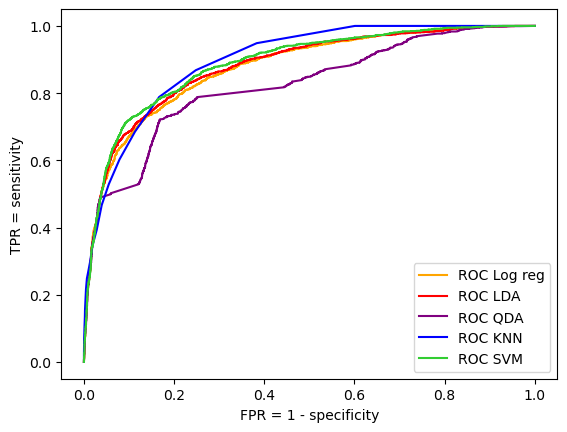

In [81]:
calibrated_svc = CalibratedClassifierCV(model_SVM, method='sigmoid', cv='prefit')

def plot_roc(predict_fn, X, y, label=None, color=None):
    fprs, tprs, t = roc_curve(y, predict_fn(X)[:,-1])
    
    # Plot the ROC
    plt.plot(fprs, tprs, label="ROC "+label, color=color)
    plt.xlabel("FPR = 1 - specificity")
    plt.ylabel("TPR = sensitivity")
    plt.legend()

auc_list = []

for name, model, X, color in [('Log reg', model_logistic, X_train[features_logistic], "orange"), 
                    ('LDA', model_LDA, X_train[features_LDA], "red"), 
                    ('QDA', model_QDA, X_train[features_QDA], "purple"),
                    ('KNN', model_KNN_all, X_train, "blue"),
                    ('SVM', calibrated_svc, X_train[features_SVM], "limegreen")
                   ]:
    model.fit(X, y_train)
    plot_roc(model.predict_proba, X, y_train, name, color)
    y_prob_pred = model.predict_proba(X)[:, 1]
    auc_ = roc_auc_score(y_train, y_prob_pred)
    auc_list.append(auc_)
    print("AUC for {}: ".format(name), auc_)

We choose SVM as the best classification model.

First, we oserve that AUC values obtained by ROC curves are very similar, with exception for QDA, so we exclude it. Along the remaining models, we discard LDA because it requires to assume that data are normally distributed. Logistic regression does not perform as well as SVM and it's the only model that poorly considers "ExitRates". In the end, KNN is an algorithm that shows problems when the dimensionality of the dataset is high and furthermore there's the risk of dummy variables influencing results in a wrong way. For both KNN and SVM we need to set parameters, but SVM results more robust. In addition, SVM has a discriminative approach, that makes it suitable for prediction.

As we can see, the chosen model performs well on the test set, both for threshold equals to 0.5 and for empirical threshold.

In [82]:
metrics_SVM_test, cm_SVM_test = classification_metrics_test(calibrated_svc, 'SVM', X_train[features_SVM], y_train, X_test[features_SVM], y_test, 0.5)
metrics_SVM_test

,Model,Accuracy,Sensitivity,Specificity
0,SVM,0.884491,0.798715,0.899809


In [83]:
metrics_SVM_test_empirical, cm_SVM_test_empirical = classification_metrics_test(calibrated_svc, 'SVM', X_train[features_SVM], 
                                                                                y_train, X_test[features_SVM], y_test, empirical_threshold)
metrics_SVM_test_empirical

,Model,Accuracy,Sensitivity,Specificity
0,SVM,0.798507,0.843683,0.79044


AUC for SVM on test set:  0.8945033798584185


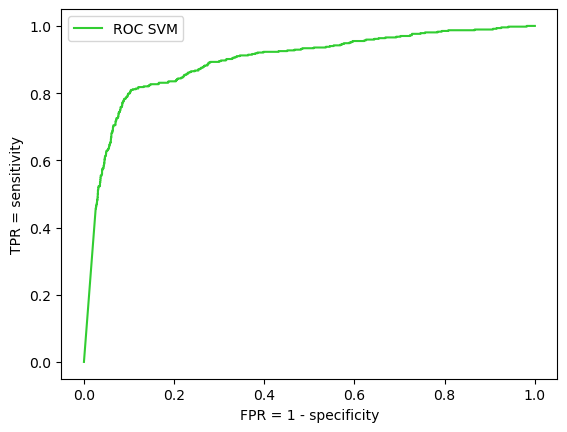

In [84]:
calibrated_svc.fit(X_train[features_SVM], y_train)
plot_roc(calibrated_svc.predict_proba, X_test[features_SVM], y_test, 'SVM', "limegreen")
y_prob_pred = calibrated_svc.predict_proba(X_test[features_SVM])[:, 1]
auc_ = roc_auc_score(y_test, y_prob_pred)
print("AUC for SVM on test set: ", auc_)

## 3. CLUSTERING

The aim of our analysis is to divide customers into two groups:
- The ones that purchased something ('Revenue'== TRUE)
- The ones that exit the websites without purchasing ('Revenue'==FALSE)

The analysis has been performed using the test set because clustering doesn't have a train phase and in the end we will compare the performances of the best clustering algorithm with the ones of the best classification algorithm (previously tested on this test set). Moreover, classification algorithms are built using the training set, so it would be uneven comparing the performances of clustering and classification algorithm using the training set.

## 3.1 Variance selection

Since some clustering algorithms relies on distance metrics, we need data to have the same scale. For this reason, we standardize numeric features. After standardization, we perform variance selection to remove features with a very low variance, as they are not so informative.

In [85]:
scaler = StandardScaler()

X_test = test_set.drop(columns="Revenue")
y_test = test_set["Revenue"].astype(int)

test_scaled = pd.DataFrame(scaler.fit_transform(X_test[numeric_features_Exit]))
test_scaled.columns = X_test[numeric_features_Exit].columns
X_test = pd.concat([test_scaled,X_test[categorical_features]],axis=1)

threshold = 0.0075 
variance_selector = VarianceThreshold(threshold=threshold)

X_test = X_test.loc[:, variance_selector.fit(X_test).get_support()]
columns_remaining = X_test.columns.tolist()

print("Features: ", X_test.columns.tolist())
print("Number of features: ", len(columns_remaining))

Features:  ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep', 'OperatingSystems_1', 'OperatingSystems_2', 'OperatingSystems_3', 'OperatingSystems_4', 'OperatingSystems_8', 'Browser_1', 'Browser_2', 'Browser_3', 'Browser_4', 'Browser_5', 'Browser_6', 'Browser_8', 'Browser_10', 'Region_1', 'Region_2', 'Region_3', 'Region_4', 'Region_5', 'Region_6', 'Region_7', 'Region_8', 'Region_9', 'TrafficType_1', 'TrafficType_2', 'TrafficType_3', 'TrafficType_4', 'TrafficType_5', 'TrafficType_6', 'TrafficType_8', 'TrafficType_10', 'TrafficType_11', 'TrafficType_13', 'TrafficType_20', 'VisitorType_New_Visitor', 'VisitorType_Returning_Visitor', 'Weekend_False', 'Weekend_True']
Number of features:  57


We set the parameters.

In [86]:
n_clusters = 2
element_distance_metric = 'euclidean'
linkage = 'ward'

## 3.2 Functions to evaluate clustering performances

In [87]:
def get_count_nk(cluster_labels,k):
    return np.count_nonzero(cluster_labels == k)

def get_count_nj(class_labels,j):
    return np.count_nonzero(class_labels == j)

def get_count_nkj(cluster_labels,class_labels,k,j):
    return len(np.intersect1d(np.where(cluster_labels == k)[0], np.where(class_labels == j)[0]))

def get_precision(cluster_labels, class_labels, k, j):
    return get_count_nkj(cluster_labels,class_labels,k,j)/get_count_nk(cluster_labels,k)

def get_recall(cluster_labels, class_labels, k, j):
    return get_count_nkj(cluster_labels,class_labels,k,j)/get_count_nj(class_labels,j)

## da rivedere
def get_cluster_purity(cluster_labels,class_labels,k):
    precisions = []
    labels_in_cluster_k = np.unique(cluster_labels)
    for label in labels_in_cluster_k:
        precisions.append(get_precision(cluster_labels,class_labels,k,label))
    return max(precisions)

def get_total_purity(cluster_labels,class_labels):
    purities = []
    labels_in_cluster_k = np.unique(cluster_labels)

    for cluster in labels_in_cluster_k:
        purities.append(get_cluster_purity(cluster_labels,class_labels,cluster)*(get_count_nk(cluster_labels,cluster)/len(cluster_labels)))
    return sum(purities)

def get_accuracy(cluster_labels,class_labels):
    return sum(cluster_labels == class_labels)/len(class_labels)

In [88]:
# returns the external indexes
def get_cluster_metrics(cluster_labels,class_labels,model_name):
    
    accuracy = get_accuracy(cluster_labels,class_labels)
    
    cluster_label_unique = np.sort(np.unique(cluster_labels))
    class_label_unique = np.sort(np.unique(class_labels))
    
    precisions = []
    recalls = []
    
    purities = []
    
    for k in cluster_label_unique:
        for j in class_label_unique:
            precisions.append(get_precision(cluster_labels,class_labels,k,j))
        purities.append(get_cluster_purity(cluster_labels,class_labels,k))
        
    for j in class_label_unique:
        for k in cluster_label_unique:
            recalls.append(get_recall(cluster_labels,class_labels,k,j))
    
    tot_purity = get_total_purity(cluster_labels,class_labels)
    
    jaccard = sklearn.metrics.jaccard_score(class_labels, cluster_labels)
    
    data_gen = {
        'Accuracy':[accuracy],
        'purity cluster 0':[purities[0]],
        'purity cluster 1':[purities[1]],
        'tot_purity':[tot_purity],
        'jaccard':[jaccard],
    }
    data_precision = {
        'precision cluster0-class0':[precisions[0]],
        'precision cluster0-class1':[precisions[1]],
        'precision cluster1-class0':[precisions[2]],
        'precision cluster1-class1':[precisions[3]],
    }
    data_recall = {
        'recall class0-cluster0':[recalls[0]],
        'recall class0-cluster1':[recalls[1]],
        'recall class1-cluster0':[recalls[2]],
        'recall class1-cluster1':[recalls[3]],
    }
    data_gen = pd.DataFrame(data_gen)
    data_gen.rename(index={0: model_name}, inplace=True)
    data_precision = pd.DataFrame(data_precision)
    data_precision.rename(index={0: model_name}, inplace=True)
    data_recall = pd.DataFrame(data_recall)
    data_recall.rename(index={0: model_name}, inplace=True)
    return data_gen,data_precision,data_recall # return accuracy, precisions, recalls, purities, tot_purity, jaccard

In [89]:
def plot_roc_curve_clustering(labels_true,labels_pred,ax,name):
    labels_binary = np.where(labels_pred == 1, 1, 0)
    fpr, tpr, _ = roc_curve(labels_true, labels_binary)
    roc_auc = auc(fpr, tpr)

    ax.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    ax.plot([0, 1], [0, 1], color='gray', linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC Curve for '+ name)
    ax.legend(loc='lower right')
    ax.grid(True)

In [90]:
def plot3d(X, labels,ax):
    # Set matplotlib to generate static images
    # %matplotlib inline
    # Set matplotlib as interactive
    # %matplotlib notebook
       
    pca = PCA(n_components=3)
    X = X.reshape(X.shape[0], -1)
    X = pca.fit_transform(X)
    
    unique_labels = np.unique(labels)

    labels = labels.copy()
    labels += np.abs(unique_labels.min())
    nlabels = len(unique_labels)
    
    col = ('tab10' if nlabels <= 10 else 
          ('tab20' if nlabels <= 20 else
           'hsv'))
    cmap = plt.cm.get_cmap(col)
    smap = plt.cm.ScalarMappable(
              norm=mcolors.Normalize(unique_labels.min(), unique_labels.max()+1), 
              cmap=cmap)
    ax.scatter(xs=X[:, 0], ys=X[:, 1], zs=X[:, 2], c=labels, cmap=cmap)
    ax.set_title('Clustering results')

In [91]:
def assign_color_label(class_labels, cluster_labels):
    unique_class_labels = np.unique(class_labels)
    unique_cluster_labels = np.unique(cluster_labels)
    combined_labels = [f'Class {c}_Cluster {cl}' for c in unique_class_labels for cl in unique_cluster_labels]
    color_labels = np.array([f'Class {c}_Cluster {cl}' for c, cl in zip(class_labels, cluster_labels)])

    n_labels = len(combined_labels)
    col = ('tab10' if n_labels <= 10 else 
           ('tab20' if n_labels <= 20 else
           'hsv'))
    cmap = plt.cm.get_cmap(col, n_labels)

    color_map = dict(zip(combined_labels, cmap.colors))

    color_labels_mapped = [color_map[label] for label in color_labels]

    return color_labels_mapped

def plot3d_class_and_cluster_labels(X, class_labels, cluster_labels,ax):    
    pca = PCA(n_components=3)
    X = X.reshape(X.shape[0], -1)
    X = pca.fit_transform(X)
    
    color_labels_mapped = assign_color_label(class_labels, cluster_labels)
    smap = plt.cm.ScalarMappable(cmap=plt.cm.colors.ListedColormap(color_labels_mapped))
    sc = ax.scatter(xs=X[:, 0], ys=X[:, 1], zs=X[:, 2], c=color_labels_mapped, cmap=smap.cmap)
    smap.set_array(color_labels_mapped)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Cluster vs classes')

In [92]:
def purity_vs_jaccard_plot(X,cluster_labels,class_labels):
    plt.subplots(nrows=1, ncols=2, figsize=(15, 6), subplot_kw={'projection': '3d'})

    ax1 = plt.subplot(1, 2, 1)
    plot3d(X, cluster_labels, ax1)

    ax2 = plt.subplot(1,2,2)
    plot3d_class_and_cluster_labels(X, class_labels, cluster_labels,ax2)

    plt.tight_layout()
    plt.show();

## 3.3 PCA

Since our dataset has a lot of features, we perform PCA to reduce the dimensionality. We keep a number of components that explains the 95% of the variance. We first scale the numeric features.

In [93]:
pca = PCA()
X_test_pca = pca.fit_transform(X_test)

# Compute the cumulative percentage of variance explained
explained_variance_ratio_cumsum = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that explains at least 95% of the variance
n_components = np.argmax(explained_variance_ratio_cumsum >= 0.95) + 1 #27
print("Number of PCs to have at least 95% of variance explained: ", n_components)
pca = PCA(n_components=n_components)
X_test_pca = pca.fit_transform(X_test)
X_test_pca = pca.transform(X_test)

Number of PCs to have at least 95% of variance explained:  27


We do visual inspection of the first two Principal Components reporting the scatterplot.

<AxesSubplot:>

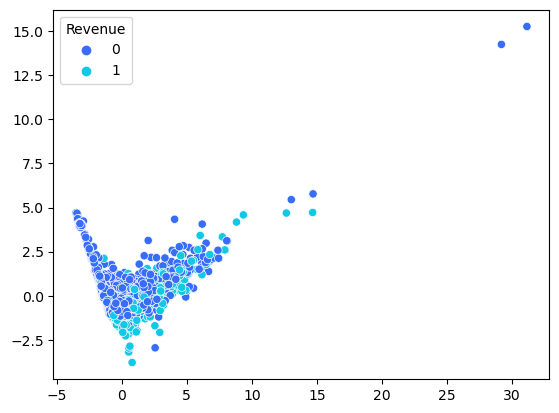

In [94]:
X0_range = (X_test_pca[:,0].min(), X_test_pca[:,0].max())
X1_range = (X_test_pca[:,1].min(), X_test_pca[:,1].max())

sns.scatterplot(x=X_test_pca[:,0], y=X_test_pca[:,1], hue=y_test, marker='o')

## 3.4 Clustering

We want an analysis of the dataset through clustering algorithms, to then compare the best clustering algorithm with the best classification algorithm. We decide to build both hierarchical (Bottom-up) and partitioning clustering (k-means and DBSCAN). To evaluate the best clustering algorithm, we use external indexes and we will focus our attention on purity and Jaccard index. We use external indexes because we want to predict the outcome for the binary variable "Revenue", so it's important to evaluate not only clustering performances, but also if cluster labels match class labels, so consistency.

## 3.5 Hierarchical clustering

### Bottom-up

In [95]:
model_agglomerative = AgglomerativeClustering(n_clusters=n_clusters, affinity=element_distance_metric, linkage=linkage)
labels_agglomerative = model_agglomerative.fit_predict(X_test_pca)

In [96]:
metrics_agglomerative,precision_agglomerative,recall_agglomerative = get_cluster_metrics(labels_agglomerative,y_test,'Agglomerative')

precision_agglomerative
recall_agglomerative
metrics_agglomerative

,Accuracy,purity cluster 0,purity cluster 1,tot_purity,jaccard
Agglomerative,0.751136,0.833333,0.983871,0.848475,0.006477


As we can see from the results, we have a high purity (clusters are well separated) but a very low jaccard index (classes are not correctly assigned to clusters). Here we have two plots:
1. The one on the left describes only the clustering results (takes into account only the labels coming from clustering), we can see that the separation is acceptable.
2. The one on the right takes into account the labels of clustering and the labels stored in the test set. If we had a high jaccard index this plot would be very similar to the one on the left. On the contrary, here we have other two colors (pink and red) representing the missclassified elements.

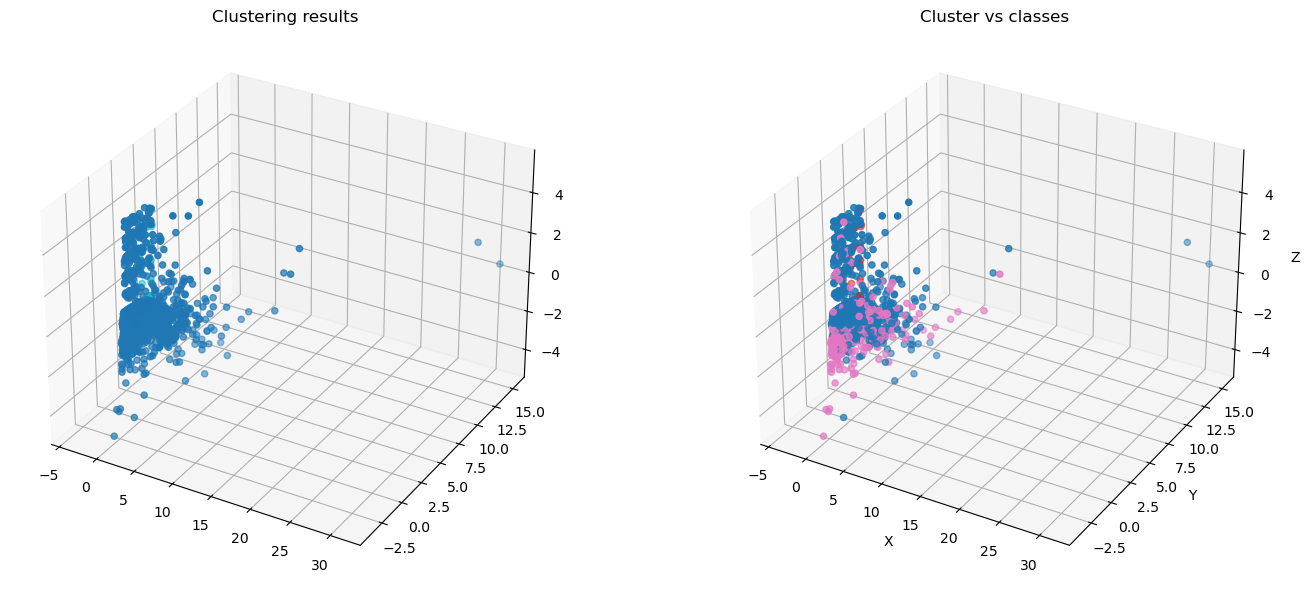

In [97]:
purity_vs_jaccard_plot(X_test.to_numpy(),labels_agglomerative,y_test)

|             | Class 0 (Revenue = FALSE)  | Class 1  (Revenue = TRUE) |
|-------------|---------:|---------:|
| Cluster 0   | Blue     | Pink      |
| Cluster 1   | Red      | Light blue      | 

## 3.6 Partitioning clustering

### K-means

In [98]:
model_kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0)             
labels_kmeans = model_kmeans.fit_predict(X_test_pca)

In [99]:
metrics_kmeans, precision_kmeans, recall_kmeans = get_cluster_metrics(labels_kmeans,y_test,'K-means')
precision_kmeans

,precision cluster0-class0,precision cluster0-class1,precision cluster1-class0,precision cluster1-class1
K-means,0.870285,0.129715,0.731405,0.268595


In [100]:
recall_kmeans

,recall class0-cluster0,recall class0-cluster1,recall class1-cluster0,recall class1-cluster1
K-means,0.864627,0.135373,0.721627,0.278373


In [101]:
metrics_kmeans

,Accuracy,purity cluster 0,purity cluster 1,tot_purity,jaccard
K-means,0.775795,0.870285,0.731405,0.848475,0.158343


As we saw for hierarchical clustering, we have a high purity and a low jaccard index. 

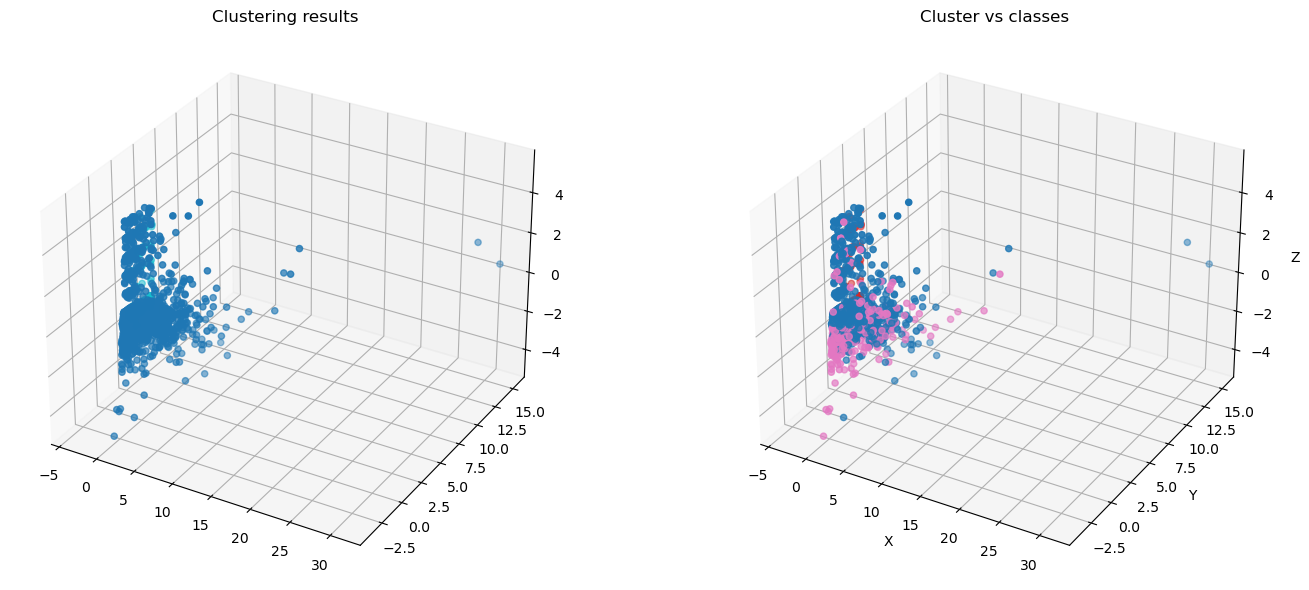

In [102]:
purity_vs_jaccard_plot(X_test.to_numpy(),labels_agglomerative,y_test)

|             | Class 0 (Revenue = FALSE)  | Class 1  (Revenue = TRUE) |
|-------------|---------:|---------:|
| Cluster 0   | Blue     | Pink      |
| Cluster 1   | Red      | Light blue      | 

### DBSCAN

To perform DBSCAN we choose the parameters Eps and MinPts.
- MinPts = number of desired clusters + 1 = 3
- Eps is chosen by looking at the k-distance graph for k=3. From the plot we can see where the trend of the function changes and choose the best Eps.

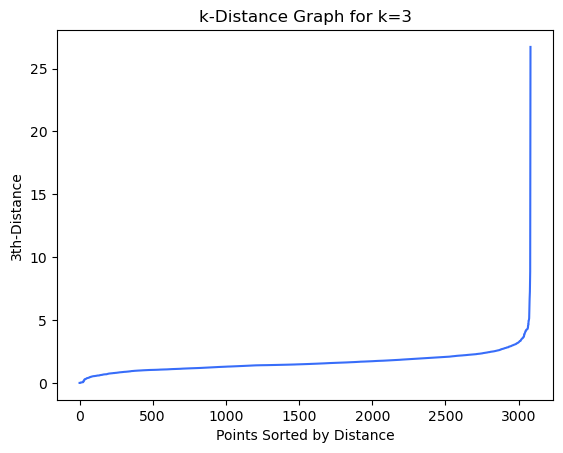

In [103]:
X=X_test_pca
k = 3
neigh = NearestNeighbors(n_neighbors=k)
distances, _ = neigh.fit(X).kneighbors(X)

# Sort the distances and plot the k-distance graph
distances = np.sort(distances[:, -1])  # Take the distance to the k-th nearest neighbor
plt.plot(np.arange(len(distances)), distances)
plt.xlabel('Points Sorted by Distance')
plt.ylabel(f'{k}th-Distance')
plt.title(f'k-Distance Graph for k={k}')
plt.show();

In [104]:
model_DBSCAN = DBSCAN(eps=4.1, min_samples=3)
labels_DBSCAN = model_DBSCAN.fit_predict(X_test_pca)

In [105]:
metrics_DBSCAN,precision_DBSCAN,recall_DBSCAN = get_cluster_metrics(labels_DBSCAN[labels_DBSCAN!=-1],y_test[labels_DBSCAN!=-1],'DBSCAN')
precision_DBSCAN

,precision cluster0-class0,precision cluster0-class1,precision cluster1-class0,precision cluster1-class1
DBSCAN,0.849656,0.150344,0.666667,0.333333


In [106]:
recall_DBSCAN

,recall class0-cluster0,recall class0-cluster1,recall class1-cluster0,recall class1-cluster1
DBSCAN,0.99923,0.00077,0.997826,0.002174


In [107]:
metrics_DBSCAN

,Accuracy,purity cluster 0,purity cluster 1,tot_purity,jaccard
DBSCAN,0.849149,0.849656,0.666667,0.849476,0.002165


As we saw for hierarchical clustering and k-means, we have a high purity and a low jaccard index. 

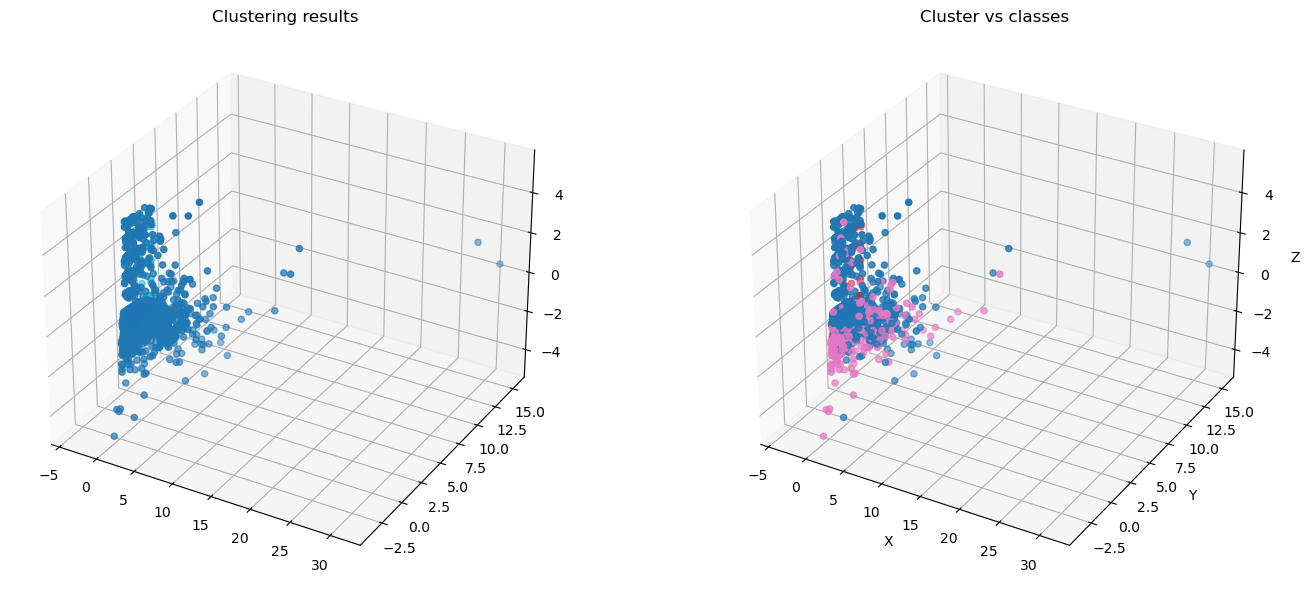

In [108]:
purity_vs_jaccard_plot(X_test.to_numpy(),labels_agglomerative,y_test)

|             | Class 0 (Revenue = FALSE)  | Class 1  (Revenue = TRUE) |
|-------------|---------:|---------:|
| Cluster 0   | Blue     | Pink      |
| Cluster 1   | Red      | Light blue      | 

## 3.7 Comparison between the algorithms

In [109]:
metrics_df = pd.DataFrame()
metrics_df = pd.concat([metrics_agglomerative,metrics_kmeans,metrics_DBSCAN],axis=0)
metrics_df

,Accuracy,purity cluster 0,purity cluster 1,tot_purity,jaccard
Agglomerative,0.751136,0.833333,0.983871,0.848475,0.006477
K-means,0.775795,0.870285,0.731405,0.848475,0.158343
DBSCAN,0.849149,0.849656,0.666667,0.849476,0.002165


In [110]:
precision_df = pd.DataFrame()
precision_df = pd.concat([precision_agglomerative,precision_kmeans,precision_DBSCAN],axis=0)
precision_df

,precision cluster0-class0,precision cluster0-class1,precision cluster1-class0,precision cluster1-class1
Agglomerative,0.833333,0.166667,0.983871,0.016129
K-means,0.870285,0.129715,0.731405,0.268595
DBSCAN,0.849656,0.150344,0.666667,0.333333


In [111]:
recall_df = pd.DataFrame()
recall_df = pd.concat([recall_agglomerative,recall_kmeans,recall_DBSCAN],axis=0)
recall_df

,recall class0-cluster0,recall class0-cluster1,recall class1-cluster0,recall class1-cluster1
Agglomerative,0.883365,0.116635,0.989293,0.010707
K-means,0.864627,0.135373,0.721627,0.278373
DBSCAN,0.999230,0.000770,0.997826,0.002174


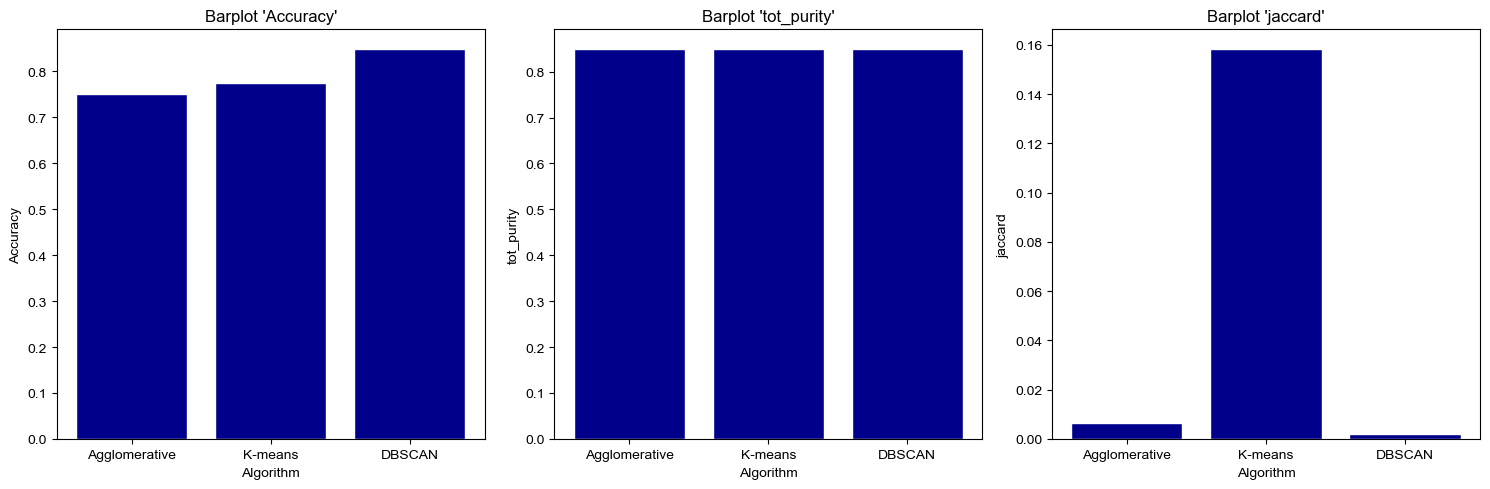

In [112]:
columns = ['Accuracy', 'tot_purity', 'jaccard']

num_cols = len(columns)
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(15, 5))

sns.set_style('whitegrid')
palette = 'Set2'

for i, col in enumerate(columns):
    values = metrics_df.loc[:,col]
    axes[i].bar(metrics_df.index, values, color="darkblue")
    axes[i].set_title(f"Barplot '{col}'")
    axes[i].set_xlabel('Algorithm')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show();

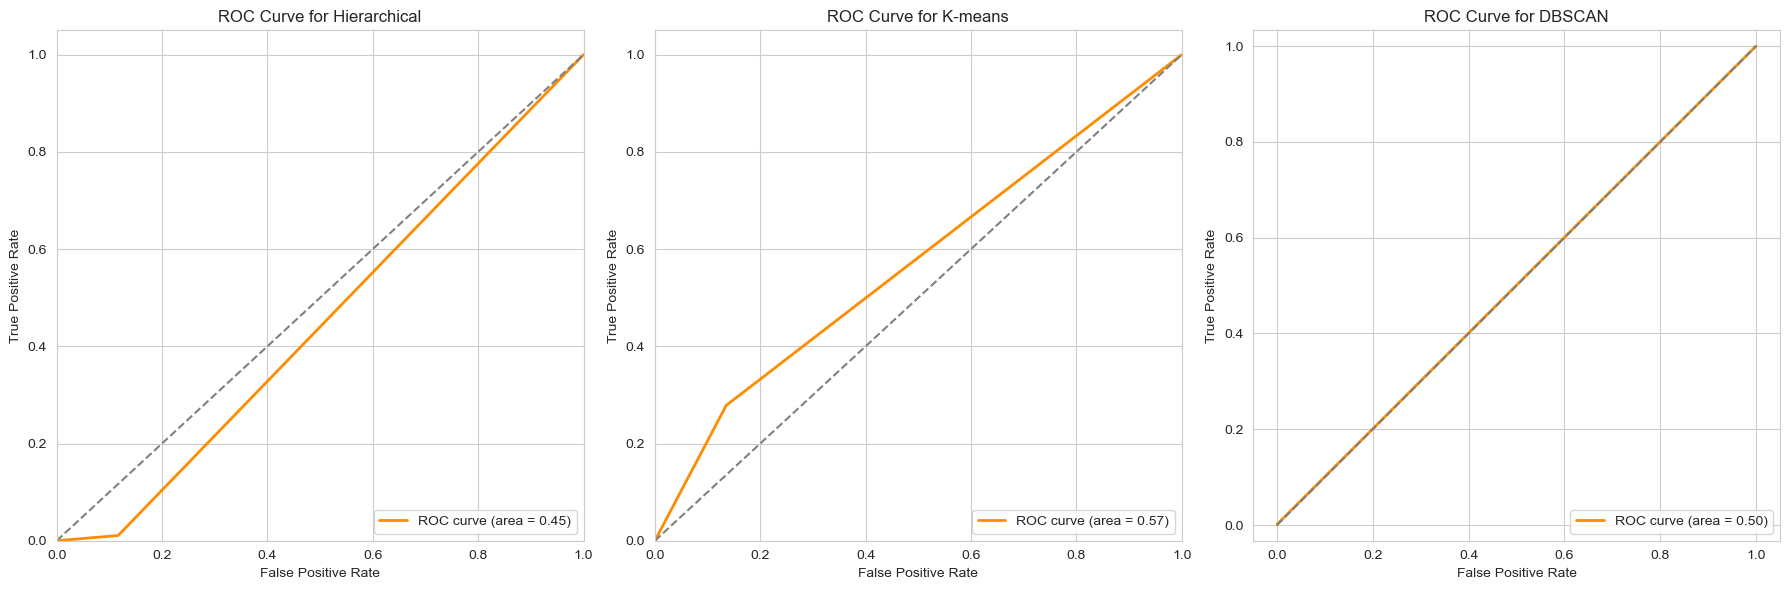

In [113]:
plt.figure(figsize=(18, 6))
ax1 = plt.subplot(1, 3, 1)
plot_roc_curve_clustering(y_test.to_numpy(), labels_agglomerative, ax1,'Hierarchical')

ax2 = plt.subplot(1, 3, 2)
plot_roc_curve_clustering(y_test.to_numpy(), labels_kmeans, ax2,'K-means')

ax3 = plt.subplot(1, 3, 3)
plot_roc_curve_clustering(y_test.to_numpy(), labels_DBSCAN, ax3,'DBSCAN')

plt.axis('equal')
plt.tight_layout()
plt.show();

As we can see the DBSCAN algorithm doesn't perform well (it's equivalent to a random classifier). As we expected looking at the jaccard index, also hierarchical clustering and k-means perform poorly.
In the end, we choose k-means as the best algorithm because it has the highest AUC.

## 4. Conclusion

Even if k-means is the best clustering algorithm, it performs poorly (the AUC is only 0.57). On the contrary SVM (with the selected features) performs very well on the test data (the AUC is around 0.89). So, the best model is the one of classification.

The best algorithm is SVM.